<a href="https://colab.research.google.com/github/fredericms/Projek/blob/main/Penelitian_Tesis_Frederic_M_S.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Judul: Analisis Prediksi Indeks Ketahanan Pangan di Indonesia dengan Pendekatan Ensemble Machine Learning
Oleh: Frederic Morado Saragih

# Mengecek versi Python dan library yang digunakan

In [141]:
!python --version

Python 3.11.11


## Impor Library

In [142]:
!pip install scikit-learn==1.3.0

In [143]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
import xgboost as xgb
import sklearn

from sklearn import metrics, linear_model
from sklearn.preprocessing import LabelEncoder, MinMaxScaler
from sklearn.model_selection import train_test_split, GridSearchCV, KFold, cross_val_score
from sklearn.linear_model import LinearRegression
from sklearn.svm import SVR
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error
from sklearn.ensemble import RandomForestRegressor, VotingRegressor
from typing_extensions import final

In [144]:
print("Versi Pandas:", pd.__version__)
print("Versi Numpy:", np.__version__)
print("Versi XGBoost:", xgb.__version__)
print("Versi Sklearn:", sklearn.__version__)

Versi Pandas: 2.2.2
Versi Numpy: 1.26.4
Versi XGBoost: 2.1.4
Versi Sklearn: 1.3.0


## Membaca File

### Skor Indeks Ketahanan Pangan berdasarkan Kab/Kota di Indonesia (tahun 2018-2024)
Sumber: [Laman situs Peta Ketahanan dan Kerentanan Pangan (Food Security and Vulnerability Atlas (FSVA)) Indonesia](https://fsva.badanpangan.go.id/)

####Tahun 2018

In [145]:
URL = 'https://drive.google.com/file/d/1A2ZYfFQRgmCPHB7LX7hNbGiJA6Guu5_i/view?usp=sharing'
path = 'https://drive.google.com/uc?export=download&id='+URL.split('/')[-2]
skor_kab2018 = pd.read_csv(path)
skor_kab2018

,Wilayah,Tahun,NCPR,Kemiskinan (%),Pengeluaran Pangan (%),Tanpa Listrik (%),Tanpa Air Bersih (%),Lama Sekolah Perempuan (tahun),Rasio Tenaga Kesehatan,Angka Harapan Hidup (tahun),Stunting (%),Skor IKP
0,Kabupaten Aceh Barat,2018,0.42,20.28,42.10,2.29,33.76,9.38,2.32,67.62,33.2,75.45
1,Kabupaten Aceh Barat Daya,2018,0.59,18.31,51.54,0.95,45.10,8.92,1.95,64.51,31.6,71.29
2,Kabupaten Aceh Besar,2018,0.55,15.41,54.60,0.82,26.99,9.64,1.78,69.52,31.2,77.77
3,Kabupaten Aceh Jaya,2018,0.25,14.85,52.83,0.00,42.31,8.42,7.44,66.77,38.3,74.67
4,Kabupaten Aceh Selatan,2018,0.69,14.07,69.08,0.50,53.23,8.41,5.49,63.89,44.9,67.24
...,...,...,...,...,...,...,...,...,...,...,...,...
509,Kota Ternate,2018,50.00,2.73,42.20,0.00,14.89,11.08,0.12,70.27,24.4,80.87
510,Kota Tidore Kepulauan,2018,50.00,5.45,55.88,0.00,50.30,9.57,1.00,68.64,17.5,51.15
511,Kota Tomohon,2018,0.93,6.47,47.97,0.00,28.89,10.51,0.20,71.18,13.4,71.76
512,Kota Tual,2018,50.00,24.00,49.60,5.66,43.49,10.11,0.69,64.61,30.3,24.44


####Tahun 2019

In [146]:
URL = 'https://drive.google.com/file/d/17tqzb5ONpD4DWP1pJkCLvTizuk_9R-kg/view?usp=sharing'
path = 'https://drive.google.com/uc?export=download&id='+URL.split('/')[-2]
skor_kab2019 = pd.read_csv(path)
skor_kab2019

,Wilayah,Tahun,NCPR,Kemiskinan (%),Pengeluaran Pangan (%),Tanpa Listrik (%),Tanpa Air Bersih (%),Lama Sekolah Perempuan (tahun),Rasio Tenaga Kesehatan,Angka Harapan Hidup (tahun),Stunting (%),Skor IKP
0,Kabupaten Aceh Barat,2019,0.68,19.31,40.58,1.45,29.88,9.32,2.75,67.72,32.63,74.90
1,Kabupaten Aceh Barat Daya,2019,0.35,17.10,57.39,1.96,55.03,8.59,2.55,64.65,35.41,70.53
2,Kabupaten Aceh Besar,2019,0.48,14.47,36.78,1.03,11.35,9.82,1.72,69.59,38.72,81.67
3,Kabupaten Aceh Jaya,2019,0.49,14.16,50.78,1.36,24.51,8.60,8.45,66.88,34.00,76.79
4,Kabupaten Aceh Selatan,2019,0.69,14.01,55.21,0.75,50.19,8.50,5.64,64.02,35.93,70.06
...,...,...,...,...,...,...,...,...,...,...,...,...
509,Kota Ternate,2019,50.00,3.00,3.31,0.26,8.05,11.02,0.12,70.50,19.64,84.89
510,Kota Tidore Kepulauan,2019,17.72,5.95,6.53,0.21,36.84,9.75,1.00,68.87,28.19,59.95
511,Kota Tomohon,2019,2.05,5.95,11.61,0.28,15.59,10.79,0.16,71.43,19.22,77.81
512,Kota Tual,2019,17.05,23.42,6.22,1.75,15.66,10.21,0.63,64.89,30.98,42.72


####Tahun 2020

In [147]:
URL = 'https://drive.google.com/file/d/1o4W4RnGYHiJ_nsdxP6wdiaGuyv6DS0Af/view?usp=sharing'
path = 'https://drive.google.com/uc?export=download&id='+URL.split('/')[-2]
skor_kab2020 = pd.read_csv(path)
skor_kab2020

,Wilayah,Tahun,NCPR,Kemiskinan (%),Pengeluaran Pangan (%),Tanpa Listrik (%),Tanpa Air Bersih (%),Lama Sekolah Perempuan (tahun),Rasio Tenaga Kesehatan,Angka Harapan Hidup (tahun),Stunting (%),Skor IKP
0,Kabupaten Aceh Barat,2020,0.71,18.79,20.21,0.48,20.25,8.92,2.73,67.93,0.0,78.61
1,Kabupaten Aceh Barat Daya,2020,0.37,16.26,42.51,0.41,31.27,8.96,2.23,64.91,0.0,76.60
2,Kabupaten Aceh Besar,2020,0.40,13.92,37.93,0.84,7.72,10.55,1.96,69.77,0.0,83.99
3,Kabupaten Aceh Jaya,2020,0.30,13.36,41.55,0.94,28.09,9.06,7.09,67.11,0.0,79.42
4,Kabupaten Aceh Selatan,2020,0.80,13.09,54.14,0.77,42.92,9.01,5.08,64.27,0.0,71.92
...,...,...,...,...,...,...,...,...,...,...,...,...
509,Kota Ternate,2020,32.86,3.14,4.81,0.07,8.98,11.48,0.12,70.85,2.9,84.43
510,Kota Tidore Kepulauan,2020,1.10,6.10,9.32,0.73,39.43,9.70,1.00,69.22,0.0,54.66
511,Kota Tomohon,2020,0.91,5.62,9.94,0.00,14.26,10.91,0.15,71.79,0.6,79.44
512,Kota Tual,2020,20.03,22.68,6.12,3.92,17.21,10.28,0.86,65.21,0.0,34.80


####Tahun 2021

In [148]:
URL = 'https://drive.google.com/file/d/1DWCZiono7TaowqEl3goqSer1eNq1iLuS/view?usp=sharing'
path = 'https://drive.google.com/uc?export=download&id='+URL.split('/')[-2]
skor_kab2021 = pd.read_csv(path)
skor_kab2021

,Wilayah,Tahun,NCPR,Kemiskinan (%),Pengeluaran Pangan (%),Tanpa Listrik (%),Tanpa Air Bersih (%),Lama Sekolah Perempuan (tahun),Rasio Tenaga Kesehatan,Angka Harapan Hidup (tahun),Stunting (%),Skor IKP
0,Kabupaten Aceh Barat,2021,0.56,18.34,29.72,0.43,24.74,9.63,2.38,67.98,0.0,77.98
1,Kabupaten Aceh Barat Daya,2021,0.36,15.93,44.38,0.70,30.23,9.06,1.52,65.00,0.0,76.31
2,Kabupaten Aceh Besar,2021,0.39,13.84,35.14,0.19,11.28,10.13,1.78,69.78,14.0,83.09
3,Kabupaten Aceh Jaya,2021,0.26,12.87,38.86,0.00,26.81,9.00,4.89,67.16,0.0,79.95
4,Kabupaten Aceh Selatan,2021,0.57,12.87,44.16,0.13,32.74,9.18,2.60,64.35,0.0,75.55
...,...,...,...,...,...,...,...,...,...,...,...,...
509,Kota Ternate,2021,0.00,3.46,1.75,0.00,8.00,11.41,0.12,70.97,2.9,86.74
510,Kota Tidore Kepulauan,2021,0.00,6.52,10.62,0.00,35.28,10.05,2.77,69.34,0.0,58.48
511,Kota Tomohon,2021,0.00,5.60,8.88,0.20,15.43,11.33,0.13,71.93,0.6,80.32
512,Kota Tual,2021,0.00,22.51,4.48,2.03,15.41,10.65,0.75,65.47,0.0,41.83


####Tahun 2022

In [149]:
URL = 'https://drive.google.com/file/d/1TXRuhiZt2SvGeVXkKjwSiZikvXmjRkRP/view?usp=sharing'
path = 'https://drive.google.com/uc?export=download&id='+URL.split('/')[-2]
skor_kab2022 = pd.read_csv(path)
skor_kab2022

,Wilayah,Tahun,NCPR,Kemiskinan (%),Pengeluaran Pangan (%),Tanpa Listrik (%),Tanpa Air Bersih (%),Lama Sekolah Perempuan (tahun),Rasio Tenaga Kesehatan,Angka Harapan Hidup (tahun),Stunting (%),Skor IKP
0,Kabupaten Aceh Barat,2022,0.56,18.81,38.49,0.00,21.76,10.22,1.82,67.99,27.4,77.56
1,Kabupaten Aceh Barat Daya,2022,0.36,16.34,41.58,0.00,28.54,8.95,1.46,65.06,33.2,75.91
2,Kabupaten Aceh Besar,2022,0.36,14.05,42.98,0.26,16.28,10.47,1.74,69.79,32.4,81.49
3,Kabupaten Aceh Jaya,2022,0.31,13.23,45.81,0.56,29.90,8.74,4.56,67.19,33.7,77.41
4,Kabupaten Aceh Selatan,2022,0.78,13.18,52.86,0.00,46.34,8.75,2.43,64.40,27.3,71.02
...,...,...,...,...,...,...,...,...,...,...,...,...
509,Kota Ternate,2022,0.00,3.55,4.44,0.00,10.97,11.59,0.09,71.06,24.0,81.32
510,Kota Tidore Kepulauan,2022,0.00,6.58,10.32,0.20,38.35,10.06,1.82,69.43,25.1,55.94
511,Kota Tomohon,2022,0.00,5.69,20.01,0.00,16.05,10.64,0.13,72.06,18.3,72.89
512,Kota Tual,2022,0.00,23.26,0.77,1.64,19.88,10.39,0.68,65.68,27.7,45.18


####Tahun 2023

In [150]:
URL = 'https://drive.google.com/file/d/1uQL5SSLNQxygr7CtFkhNIBig7QGxIWBj/view?usp=sharing'
path = 'https://drive.google.com/uc?export=download&id='+URL.split('/')[-2]
skor_kab2023 = pd.read_csv(path)
skor_kab2023

,Wilayah,Tahun,NCPR,Kemiskinan (%),Pengeluaran Pangan (%),Tanpa Listrik (%),Tanpa Air Bersih (%),Lama Sekolah Perempuan (tahun),Rasio Tenaga Kesehatan,Angka Harapan Hidup (tahun),Stunting (%),Skor IKP
0,Kabupaten Aceh Barat,2023,0.59,17.93,28.02,0.00,18.32,8.83,1.69,68.19,33.6,79.95
1,Kabupaten Aceh Barat Daya,2023,0.42,15.44,52.71,0.00,21.67,9.05,1.66,65.30,35.2,76.93
2,Kabupaten Aceh Besar,2023,0.37,13.38,28.21,0.05,9.93,10.03,2.15,69.99,32.0,85.62
3,Kabupaten Aceh Jaya,2023,0.41,12.51,37.53,0.24,31.33,9.43,1.23,67.40,27.4,80.22
4,Kabupaten Aceh Selatan,2023,0.98,12.43,47.68,0.21,41.78,9.74,1.67,64.64,37.2,71.11
...,...,...,...,...,...,...,...,...,...,...,...,...
509,Kota Ternate,2023,0.00,3.11,5.23,0.00,5.95,11.82,0.01,71.38,13.8,89.51
510,Kota Tidore Kepulauan,2023,0.00,5.99,11.81,0.16,32.73,10.60,0.02,69.75,14.3,65.83
511,Kota Tomohon,2023,0.00,5.26,21.31,0.00,18.85,8.80,9.84,72.44,31.1,83.14
512,Kota Tual,2023,0.00,20.56,6.80,1.70,17.90,10.98,0.01,66.16,16.4,54.91


#### Tahun 2024

In [151]:
URL = 'https://drive.google.com/file/d/1a2nJKq1poSW3d-kYKZ1VC2_7yuIM6JSB/view?usp=drive_link'
path = 'https://drive.google.com/uc?export=download&id='+URL.split('/')[-2]
skor_kab2024 = pd.read_csv(path)
skor_kab2024

,Wilayah,Tahun,NCPR,Kemiskinan (%),Pengeluaran Pangan (%),Tanpa Listrik (%),Tanpa Air Bersih (%),Lama Sekolah Perempuan (tahun),Rasio Tenaga Kesehatan,Angka Harapan Hidup (tahun),Stunting (%),Skor IKP
0,Kabupaten Aceh Barat,2024,0.67,17.86,31.65,0.00,23.36,10.27,1.46,68.34,33.4,78.27
1,Kabupaten Aceh Barat Daya,2024,0.53,15.43,39.09,0.00,24.17,9.20,1.70,65.48,27.9,78.05
2,Kabupaten Aceh Besar,2024,0.48,13.38,26.96,0.43,10.06,10.87,1.38,70.14,30.1,84.72
3,Kabupaten Aceh Jaya,2024,0.33,12.42,40.90,0.14,26.92,8.98,4.54,67.55,34.0,79.69
4,Kabupaten Aceh Selatan,2024,0.84,12.10,37.42,0.00,34.05,8.50,2.22,64.81,40.2,73.84
...,...,...,...,...,...,...,...,...,...,...,...,...
509,Kota Ternate,2024,0.00,3.39,5.25,0.00,6.54,11.74,0.12,71.70,21.1,88.24
510,Kota Tidore Kepulauan,2024,0.00,6.35,7.71,0.00,37.75,10.17,1.44,70.10,21.3,64.68
511,Kota Tomohon,2024,0.00,5.60,34.71,0.00,19.78,11.24,0.19,72.84,10.5,83.92
512,Kota Tual,2024,0.00,20.68,5.29,0.63,12.48,10.70,0.35,66.65,32.0,59.11


## Preprocessing Data

In [152]:
features = ['Wilayah', 'Tahun', 'NCPR', 'Kemiskinan (%)', 'Pengeluaran Pangan (%)',
            'Tanpa Listrik (%)', 'Tanpa Air Bersih (%)', 'Lama Sekolah Perempuan (tahun)',
            'Rasio Tenaga Kesehatan', 'Angka Harapan Hidup (tahun)', 'Stunting (%)']
selected_features = ['Wilayah', 'Tahun', 'NCPR', 'Kemiskinan (%)', 'Pengeluaran Pangan (%)',
            'Tanpa Listrik (%)', 'Tanpa Air Bersih (%)', 'Lama Sekolah Perempuan (tahun)',
            'Rasio Tenaga Kesehatan', 'Angka Harapan Hidup (tahun)', 'Stunting (%)', 'Skor IKP']

### Salin Dataset

In [153]:
#Salin File Asli untuk dilakukan modifikasi
salinan_skor_kab2018 = skor_kab2018.copy()
salinan_skor_kab2019 = skor_kab2019.copy()
salinan_skor_kab2020 = skor_kab2020.copy()
salinan_skor_kab2021 = skor_kab2021.copy()
salinan_skor_kab2022 = skor_kab2022.copy()
salinan_skor_kab2023 = skor_kab2023.copy()
salinan_skor_kab2024 = skor_kab2024.copy()

In [154]:
#Menggabungkan dataset dari tahun 2018-2023
dataset_gabungan = [salinan_skor_kab2018, salinan_skor_kab2019, salinan_skor_kab2020, salinan_skor_kab2021, salinan_skor_kab2022, salinan_skor_kab2023]

#Menggabungkan Dataset
salinan_skor_gabungan = pd.concat(dataset_gabungan)
salinan_skor_gabungan.to_csv('Data IKP.csv', index=False)
salinan_skor_gabungan.head()

,Wilayah,Tahun,NCPR,Kemiskinan (%),Pengeluaran Pangan (%),Tanpa Listrik (%),Tanpa Air Bersih (%),Lama Sekolah Perempuan (tahun),Rasio Tenaga Kesehatan,Angka Harapan Hidup (tahun),Stunting (%),Skor IKP
0,Kabupaten Aceh Barat,2018,0.42,20.28,42.10,2.29,33.76,9.38,2.32,67.62,33.2,75.45
1,Kabupaten Aceh Barat Daya,2018,0.59,18.31,51.54,0.95,45.10,8.92,1.95,64.51,31.6,71.29
2,Kabupaten Aceh Besar,2018,0.55,15.41,54.60,0.82,26.99,9.64,1.78,69.52,31.2,77.77
3,Kabupaten Aceh Jaya,2018,0.25,14.85,52.83,0.00,42.31,8.42,7.44,66.77,38.3,74.67
4,Kabupaten Aceh Selatan,2018,0.69,14.07,69.08,0.50,53.23,8.41,5.49,63.89,44.9,67.24


### Data Understanding

In [155]:
#Statistik Data (Tidak Menampilkan Wilayah dan Tahun)
salinan_skor_gabungan[selected_features].describe()

,Tahun,NCPR,Kemiskinan (%),Pengeluaran Pangan (%),Tanpa Listrik (%),Tanpa Air Bersih (%),Lama Sekolah Perempuan (tahun),Rasio Tenaga Kesehatan,Angka Harapan Hidup (tahun),Stunting (%),Skor IKP
count,3084.000000,3084.000000,3084.000000,3084.000000,3084.000000,3084.000000,3084.000000,3084.000000,3084.000000,3084.000000,3084.000000
mean,2020.500000,3.981971,12.196083,30.367312,3.846521,32.459446,8.431115,5.962607,69.431845,22.711702,71.733557
std,1.708102,10.649893,7.637995,15.852802,10.833552,20.216884,1.605664,13.640853,3.505682,13.402978,14.499822
min,2018.000000,0.000000,1.680000,0.320000,0.000000,0.000000,1.000000,0.000000,54.600000,0.000000,7.380000
25%,2019.000000,0.367500,6.870000,18.410000,0.000000,18.167500,7.580000,0.460000,67.190000,13.492500,67.410000
50%,2020.500000,0.745000,10.260000,28.440000,0.400000,29.525000,8.380000,1.715000,69.715000,24.900000,75.850000
75%,2022.000000,2.420000,14.915000,40.495000,2.232500,43.282500,9.370000,4.912500,71.820000,32.400000,81.272500
max,2023.000000,50.000000,43.650000,96.420000,100.000000,100.000000,13.260000,100.000000,77.820000,65.990000,95.800000


In [156]:
salinan_skor_gabungan.info()

<class 'pandas.core.frame.DataFrame'>
Index: 3084 entries, 0 to 513
Data columns (total 12 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   Wilayah                         3084 non-null   object 
 1   Tahun                           3084 non-null   int64  
 2   NCPR                            3084 non-null   float64
 3   Kemiskinan (%)                  3084 non-null   float64
 4   Pengeluaran Pangan (%)          3084 non-null   float64
 5   Tanpa Listrik (%)               3084 non-null   float64
 6   Tanpa Air Bersih (%)            3084 non-null   float64
 7   Lama Sekolah Perempuan (tahun)  3084 non-null   float64
 8   Rasio Tenaga Kesehatan          3084 non-null   float64
 9   Angka Harapan Hidup (tahun)     3084 non-null   float64
 10  Stunting (%)                    3084 non-null   float64
 11  Skor IKP                        3084 non-null   float64
dtypes: float64(10), int64(1), object(1)
memo

### Data Cleaning

In [157]:
#Mengecek Data yang Kosong
salinan_skor_gabungan.isnull().sum()

,0
Wilayah,0
Tahun,0
NCPR,0
Kemiskinan (%),0
Pengeluaran Pangan (%),0
Tanpa Listrik (%),0
Tanpa Air Bersih (%),0
Lama Sekolah Perempuan (tahun),0
Rasio Tenaga Kesehatan,0
Angka Harapan Hidup (tahun),0


In [158]:
#Mengecek Data yang Terduplikasi
salinan_skor_gabungan.duplicated().sum()

0

### Exploratory Data Analysis (EDA)

#### Line Chart

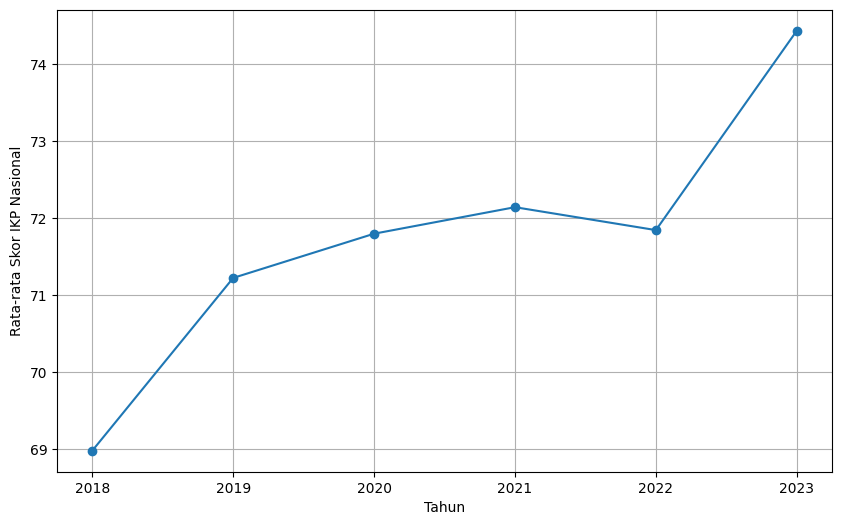

In [159]:
dataframes = {
    2018: salinan_skor_kab2018,
    2019: salinan_skor_kab2019,
    2020: salinan_skor_kab2020,
    2021: salinan_skor_kab2021,
    2022: salinan_skor_kab2022,
    2023: salinan_skor_kab2023
}

average_scores = {}
for year, df in dataframes.items():
  average_scores[year] = df['Skor IKP'].mean()

years = list(average_scores.keys())
scores = list(average_scores.values())

plt.figure(figsize=(10, 6))
plt.plot(years, scores, marker='o')
plt.xlabel('Tahun')
plt.ylabel('Rata-rata Skor IKP Nasional')
plt.grid(True)
plt.savefig("grafik.png", dpi=300)  # dpi bisa diubah sesuai kebutuhan
plt.show()

#### Boxplot pada setiap atribut (selain skor IKP) untuk deteksi outlier

##### NCPR

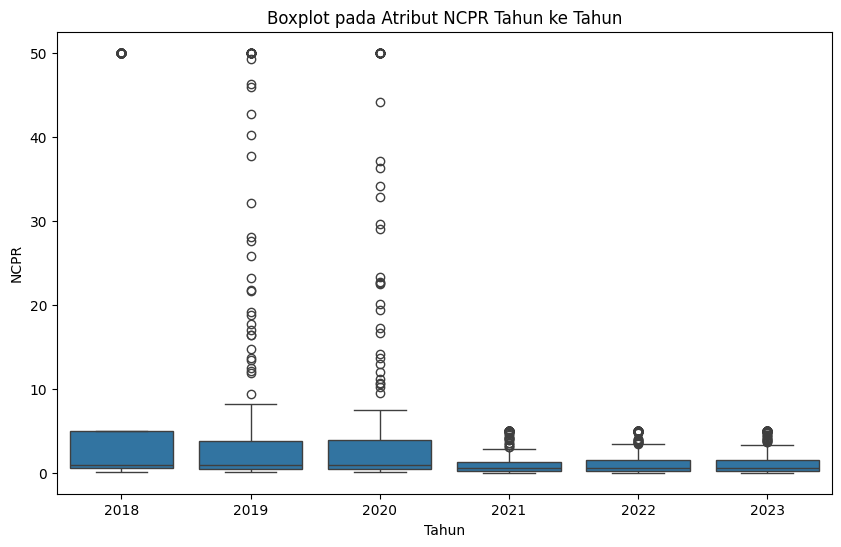

In [160]:
plt.figure(figsize=(10, 6))
sns.boxplot(x='Tahun', y='NCPR', data=salinan_skor_gabungan)
plt.title('Boxplot pada Atribut NCPR Tahun ke Tahun')
plt.xlabel('Tahun')
plt.ylabel('NCPR')
plt.show()

**Penjelasan Boxplot:**
1. Perubahan Nilai NCPR dari Tahun ke Tahun:
  *  Pada tahun 2018 hingga 2020, distribusi NCPR memiliki rentang yang relatif lebih besar, dengan banyak data di luar batas (outlier) yang menunjukkan beberapa daerah memiliki nilai NCPR yang sangat tinggi.
  *  Mulai tahun 2021 hingga 2023, distribusi menjadi lebih terkonsentrasi, dengan rentang interkuartil lebih kecil dan lebih sedikit outlier. Ini mungkin mencerminkan perbaikan dalam stabilitas atau pengendalian indikator.
2. Outlier pada Data:
Tahun 2018-2020 menunjukkan banyak outlier di bagian atas, yang menunjukkan bahwa ada daerah dengan tantangan ketahanan pangan yang signifikan.
Penurunan jumlah outlier setelah 2020 menunjukkan upaya perbaikan atau pengendalian masalah di daerah-daerah tertentu.
3. Tren Median Nilai NCPR:
Median (garis dalam kotak) terlihat menurun secara bertahap setelah 2020, yang dapat menandakan peningkatan umum dalam indeks ketahanan pangan atau perbaikan kondisi.


##### Kemiskinan

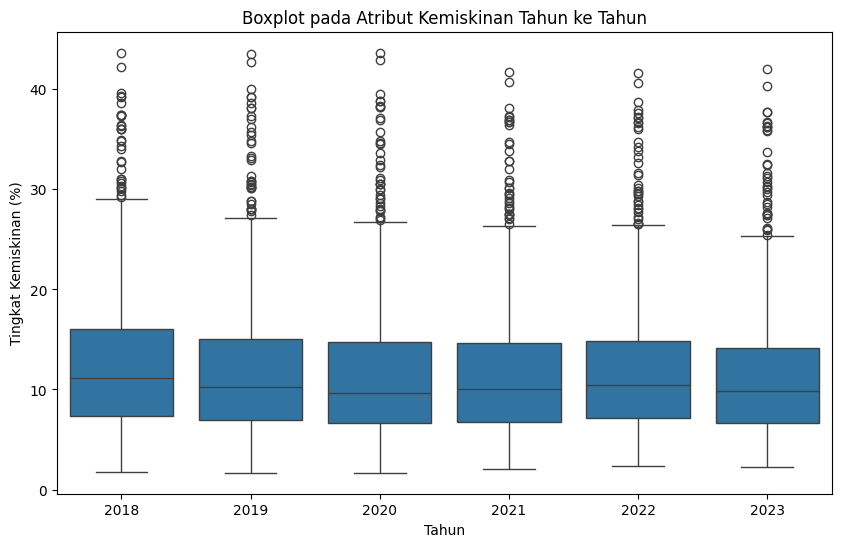

In [161]:
plt.figure(figsize=(10, 6))
sns.boxplot(x='Tahun', y='Kemiskinan (%)', data=salinan_skor_gabungan)
plt.title('Boxplot pada Atribut Kemiskinan Tahun ke Tahun')
plt.xlabel('Tahun')
plt.ylabel('Tingkat Kemiskinan (%)')
plt.show()

Gambar ini merupakan boxplot yang menunjukkan distribusi persentase kemiskinan di Indonesia dari tahun 2018 hingga 2023. Berikut adalah penjelasan dari gambar ini yang dapat dikaitkan dengan prediksi indeks ketahanan pangan di Indonesia:

1. **Perubahan Distribusi Kemiskinan**
   - **Median Kemiskinan:** Median persentase kemiskinan relatif stabil dari tahun 2018 hingga 2023. Hal ini menunjukkan bahwa sebagian besar wilayah di Indonesia memiliki tingkat kemiskinan yang tidak mengalami perubahan drastis.
   - **Rentang Interkuartil:** Rentang antara kuartil bawah dan atas (kotak utama) tetap lebar, menunjukkan adanya variasi yang cukup besar di antara daerah-daerah di Indonesia dalam hal tingkat kemiskinan.

2. **Outlier (Nilai Ekstrem)**
   - Outlier terlihat di setiap tahun, menunjukkan bahwa ada beberapa wilayah dengan tingkat kemiskinan yang jauh lebih tinggi dibandingkan wilayah lainnya.
   - Jumlah outlier ini tampaknya cukup konsisten dari tahun ke tahun, menandakan bahwa tantangan kemiskinan di wilayah tertentu bersifat kronis dan perlu intervensi lebih besar.

3. **Tren Umum**
   - Tidak ada penurunan yang signifikan pada median atau persebaran data kemiskinan selama periode 2018–2023. Hal ini menunjukkan bahwa upaya pengurangan kemiskinan mungkin belum cukup untuk membawa perubahan besar, atau ada tantangan struktural yang membutuhkan waktu lebih lama untuk diatasi.

4. **Kaitannya dengan Ketahanan Pangan**
   - **Kemiskinan dan Ketahanan Pangan:** Tingkat kemiskinan yang tinggi dapat memengaruhi kemampuan rumah tangga untuk mengakses pangan yang cukup dan bergizi. Dengan distribusi kemiskinan yang tetap stabil, tantangan ketahanan pangan di wilayah tertentu mungkin juga bertahan.
   - **Prioritas Daerah:** Wilayah dengan kemiskinan yang tinggi (termasuk outlier) memerlukan perhatian khusus karena mereka kemungkinan lebih rentan terhadap masalah ketahanan pangan.

5. **Prediksi**
   - Jika tren kemiskinan tidak menunjukkan perbaikan signifikan, indeks ketahanan pangan di Indonesia kemungkinan tidak akan meningkat secara signifikan, terutama di daerah-daerah dengan kemiskinan tinggi.
   - Upaya pengurangan kemiskinan yang lebih fokus pada wilayah dengan outlier dapat berdampak positif terhadap ketahanan pangan secara nasional.

Gambar ini menunjukkan bahwa kemiskinan tetap menjadi isu penting yang harus diatasi untuk mendukung peningkatan indeks ketahanan pangan di Indonesia.

##### Pengeluaran Pangan

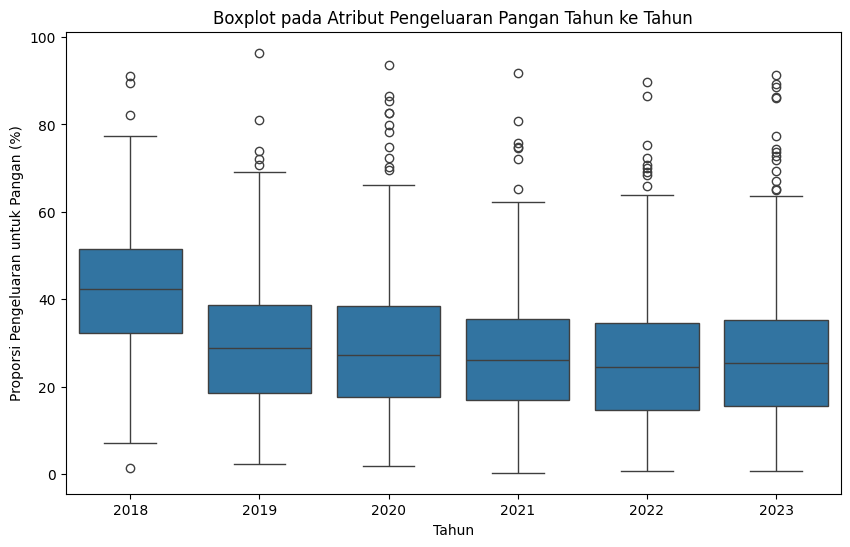

In [162]:
plt.figure(figsize=(10, 6))
sns.boxplot(x='Tahun', y='Pengeluaran Pangan (%)', data=salinan_skor_gabungan)
plt.title('Boxplot pada Atribut Pengeluaran Pangan Tahun ke Tahun')
plt.xlabel('Tahun')
plt.ylabel('Proporsi Pengeluaran untuk Pangan (%)')
plt.show()

Gambar ini adalah boxplot yang menunjukkan distribusi persentase pengeluaran untuk pangan di Indonesia dari tahun 2018 hingga 2023. Berikut adalah penjelasan gambar ini dan kaitannya dengan prediksi indeks ketahanan pangan di Indonesia:

1. **Tren Median Pengeluaran untuk Pangan**
   - Median persentase pengeluaran pangan dari tahun 2018 hingga 2023 relatif stabil, berada di kisaran 40%-50%.
   - Ini menunjukkan bahwa proporsi pengeluaran rumah tangga untuk pangan masih cukup tinggi, yang dapat mengindikasikan tingkat kesejahteraan dan kemampuan ekonomi masyarakat dalam mengakses kebutuhan pangan.

2. **Rentang Distribusi**
   - Rentang distribusi (interkuartil) relatif lebar setiap tahunnya, menunjukkan adanya variasi yang signifikan antar wilayah atau kelompok masyarakat dalam persentase pengeluaran untuk pangan.
   - Wilayah dengan pengeluaran pangan yang lebih besar cenderung lebih rentan karena proporsi pengeluaran yang tinggi menunjukkan alokasi sumber daya yang besar untuk kebutuhan dasar.

3. **Outlier (Nilai Ekstrem)**
   - Terdapat outlier setiap tahun, dengan beberapa wilayah memiliki pengeluaran pangan yang sangat tinggi (di atas 80%). Hal ini mengindikasikan adanya daerah-daerah yang kemungkinan menghadapi tekanan ekonomi lebih besar, seperti biaya pangan yang mahal atau pendapatan rumah tangga yang rendah.

4. **Kaitannya dengan Ketahanan Pangan**
   - **Pengeluaran Pangan Tinggi dan Ketahanan Pangan:** Persentase pengeluaran yang tinggi untuk pangan sering kali mencerminkan kerentanan ekonomi rumah tangga. Hal ini bisa menjadi indikator bahwa akses terhadap pangan yang terjangkau masih menjadi tantangan di wilayah tertentu.
   - **Perubahan Stabilitas:** Distribusi yang stabil dalam rentang persentase pengeluaran menunjukkan bahwa tantangan dalam pengeluaran pangan relatif konsisten selama periode ini, tanpa perbaikan signifikan.

5. **Prediksi Indeks Ketahanan Pangan**
   - Jika persentase pengeluaran pangan tetap tinggi tanpa adanya pengurangan signifikan, ini dapat menghambat peningkatan indeks ketahanan pangan, terutama di daerah-daerah dengan outlier.
   - Untuk meningkatkan ketahanan pangan, diperlukan intervensi seperti peningkatan pendapatan rumah tangga, penurunan harga pangan, atau subsidi pangan di daerah yang paling rentan.

6. **Saran Kebijakan**
   - **Peningkatan Akses Ekonomi:** Meningkatkan pendapatan rumah tangga melalui program pemberdayaan ekonomi dapat membantu mengurangi tekanan pengeluaran pangan.
   - **Stabilisasi Harga Pangan:** Mengontrol inflasi harga pangan di wilayah-wilayah dengan outlier dapat meringankan beban pengeluaran rumah tangga.
   - **Pendekatan Wilayah Khusus:** Fokus pada daerah dengan pengeluaran pangan yang tinggi (outlier) untuk memastikan keberlanjutan ketahanan pangan di seluruh wilayah Indonesia.

Secara keseluruhan, gambar ini menunjukkan bahwa stabilitas pengeluaran untuk pangan menjadi salah satu aspek penting yang perlu diperhatikan dalam upaya meningkatkan ketahanan pangan di Indonesia.

##### Tanpa Listrik

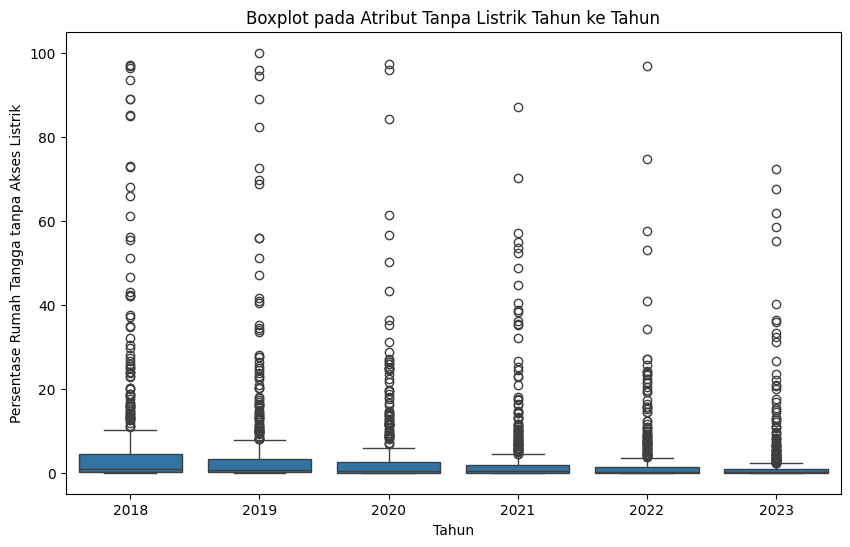

In [163]:
plt.figure(figsize=(10, 6))
sns.boxplot(x='Tahun', y='Tanpa Listrik (%)', data=salinan_skor_gabungan)
plt.title('Boxplot pada Atribut Tanpa Listrik Tahun ke Tahun')
plt.xlabel('Tahun')
plt.ylabel('Persentase Rumah Tangga tanpa Akses Listrik')
plt.show()

Gambar ini merupakan boxplot yang menunjukkan distribusi persentase populasi tanpa akses listrik di Indonesia dari tahun 2018 hingga 2023. Dalam konteks prediksi indeks ketahanan pangan, indikator akses listrik memiliki hubungan yang erat dengan ketahanan pangan karena listrik berperan penting dalam penyimpanan, distribusi, dan pengolahan makanan.

**Analisis Gambar dalam Konteks Ketahanan Pangan:**
1. **Tren Konsistensi dengan Banyak Outlier**  
   - Median nilai *tanpa listrik* cenderung rendah setiap tahun, tetapi terdapat banyak outlier dengan persentase tinggi. Ini menunjukkan bahwa sebagian besar wilayah memiliki akses listrik yang cukup baik, tetapi masih ada daerah tertentu dengan akses listrik yang sangat terbatas.
   
2. **Variasi Antar Tahun**  
   - Tidak ada perubahan signifikan dalam median atau distribusi keseluruhan dari 2018 hingga 2023, yang mengindikasikan bahwa kemajuan elektrifikasi masih mengalami tantangan di beberapa daerah terpencil.

3. **Dampak pada Ketahanan Pangan**  
   - **Penyimpanan dan Produksi Pangan:** Wilayah tanpa listrik mungkin memiliki keterbatasan dalam menyimpan makanan yang membutuhkan pendinginan, yang dapat meningkatkan risiko pemborosan makanan dan ketidakstabilan pasokan pangan.
   - **Proses Distribusi:** Ketidaktersediaan listrik juga dapat mempengaruhi efisiensi rantai pasok pangan, terutama di daerah pedesaan yang bergantung pada sistem distribusi modern.
   - **Kesejahteraan Masyarakat:** Listrik berkaitan dengan akses terhadap air bersih (melalui pompa air), irigasi, dan teknologi pertanian, yang semuanya mendukung ketahanan pangan jangka panjang.

##### Tanpa Air Bersih

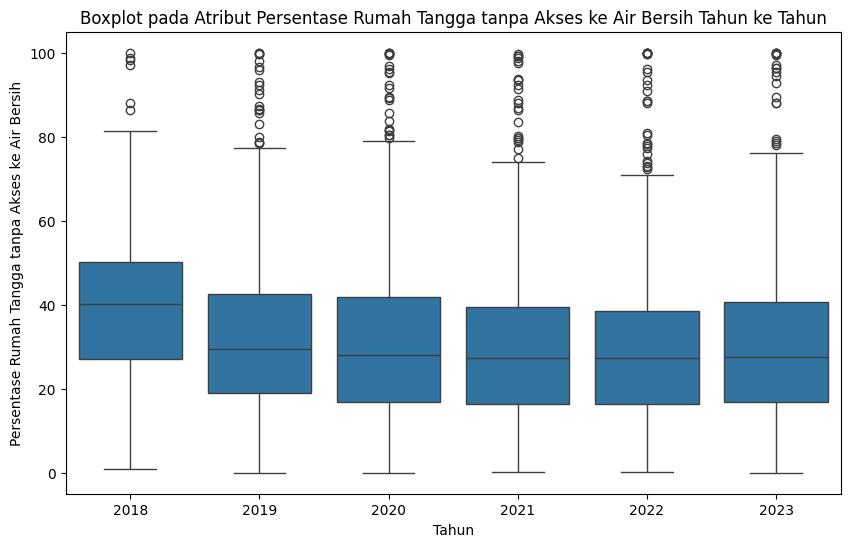

In [164]:
plt.figure(figsize=(10, 6))
sns.boxplot(x='Tahun', y='Tanpa Air Bersih (%)', data=salinan_skor_gabungan)
plt.title('Boxplot pada Atribut Persentase Rumah Tangga tanpa Akses ke Air Bersih Tahun ke Tahun')
plt.xlabel('Tahun')
plt.ylabel('Persentase Rumah Tangga tanpa Akses ke Air Bersih')
plt.show()

Gambar ini merupakan boxplot yang menunjukkan distribusi persentase populasi tanpa akses air bersih di Indonesia dari tahun 2018 hingga 2023. Dalam konteks prediksi indeks ketahanan pangan, ketersediaan air bersih merupakan faktor kritis karena berpengaruh langsung terhadap produksi pangan, kesehatan masyarakat, dan keberlanjutan sistem pertanian.

**Analisis Gambar dalam Konteks Ketahanan Pangan**  
1. **Distribusi Data**  
   - Median persentase populasi tanpa air bersih cukup tinggi, sekitar 30–40% setiap tahunnya.  
   - Rentang nilai yang luas menunjukkan bahwa ada wilayah dengan akses air bersih yang baik, tetapi juga masih banyak daerah dengan keterbatasan serius.  
   - Banyak *outlier* di atas 80–100%, menunjukkan adanya daerah-daerah yang hampir seluruh penduduknya tidak memiliki akses air bersih.

2. **Tren Konsistensi Antar Tahun**  
   - Tidak ada perubahan signifikan dalam distribusi data selama periode 2018–2023, yang mengindikasikan bahwa masalah akses air bersih masih menjadi tantangan besar di berbagai wilayah Indonesia.

3. **Dampak pada Ketahanan Pangan**  
   - **Produksi Pertanian:** Air bersih sangat penting untuk irigasi dan pemeliharaan tanah yang subur. Kurangnya akses air bersih dapat menghambat hasil pertanian dan menurunkan ketersediaan pangan.  
   - **Kesehatan Masyarakat:** Air bersih yang terbatas meningkatkan risiko penyakit akibat air yang terkontaminasi, yang dapat berdampak pada produktivitas tenaga kerja di sektor pertanian dan industri pangan.  
   - **Keamanan Pangan:** Air bersih dibutuhkan dalam proses pengolahan makanan dan kebersihan, yang jika tidak tersedia dapat meningkatkan risiko kontaminasi pangan.

##### Lama Sekolah Perempuan

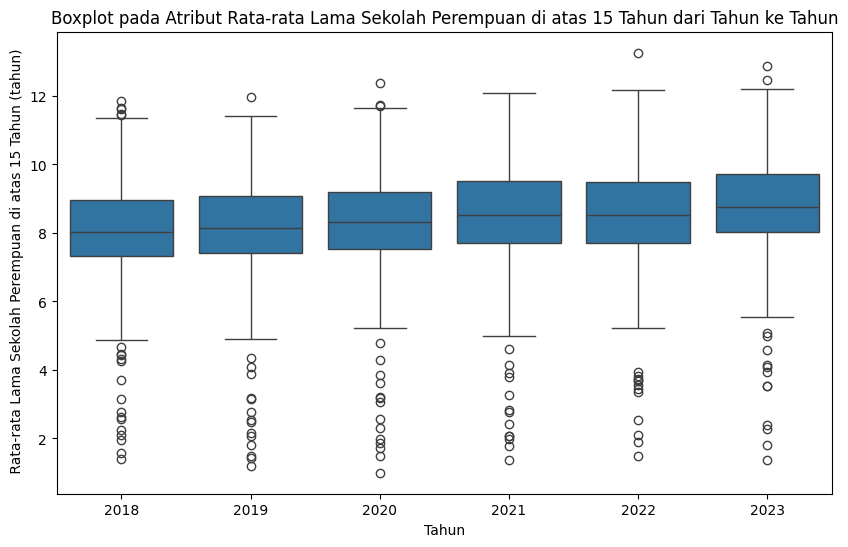

In [165]:
plt.figure(figsize=(10, 6))
sns.boxplot(x='Tahun', y='Lama Sekolah Perempuan (tahun)', data=salinan_skor_gabungan)
plt.title('Boxplot pada Atribut Rata-rata Lama Sekolah Perempuan di atas 15 Tahun dari Tahun ke Tahun')
plt.xlabel('Tahun')
plt.ylabel(' Rata-rata Lama Sekolah Perempuan di atas 15 Tahun (tahun)')
plt.show()

Gambar ini adalah boxplot yang menunjukkan distribusi lama sekolah perempuan (dalam tahun) di Indonesia dari 2018 hingga 2023. Dalam konteks prediksi indeks ketahanan pangan, tingkat pendidikan, terutama bagi perempuan, berperan penting dalam berbagai aspek ketahanan pangan, seperti pola konsumsi, gizi, dan kesejahteraan keluarga.

**Analisis Gambar dalam Konteks Ketahanan Pangan**  
1. **Distribusi Data**  
   - Median lama sekolah perempuan berada sekitar 8–9 tahun setiap tahunnya, yang berarti sebagian besar perempuan memperoleh pendidikan hingga jenjang SMP atau awal SMA.  
   - Rentang nilai menunjukkan ada kelompok yang memperoleh pendidikan lebih tinggi (~12 tahun atau lebih), tetapi juga ada yang hanya mengenyam pendidikan sangat rendah (di bawah 4 tahun).  
   - Banyaknya *outlier* di bagian bawah menunjukkan bahwa masih ada daerah dengan akses pendidikan perempuan yang terbatas.

2. **Tren Perkembangan Lama Sekolah Perempuan**  
   - Secara umum, distribusi lama sekolah perempuan stabil dari tahun ke tahun, dengan sedikit peningkatan di tahun 2023.  
   - Tidak ada perubahan signifikan dalam median atau rentang distribusi, yang mengindikasikan bahwa meskipun ada kemajuan, tantangan dalam pendidikan perempuan masih ada.

3. **Dampak pada Ketahanan Pangan**  
   - **Pengetahuan Gizi dan Pola Konsumsi:** Pendidikan berhubungan erat dengan kesadaran gizi dan pola konsumsi makanan. Perempuan dengan pendidikan lebih tinggi cenderung memiliki pemahaman lebih baik tentang pentingnya makanan bergizi bagi keluarga.  
   - **Produktivitas dan Kesejahteraan:** Perempuan yang berpendidikan lebih tinggi memiliki kesempatan lebih besar untuk bekerja, meningkatkan pendapatan keluarga, dan mendukung ketahanan pangan rumah tangga.  
   - **Kesehatan Anak dan Gizi:** Pendidikan perempuan berperan dalam menurunkan angka malnutrisi anak karena ibu yang lebih terdidik lebih cenderung memberikan pola makan yang lebih sehat bagi anak-anaknya.

**Implikasi untuk Prediksi Indeks Ketahanan Pangan**  
Dalam pendekatan *ensemble machine learning*, variabel *lama sekolah perempuan* dapat menjadi salah satu faktor prediktor penting. Model dapat mempelajari bagaimana tingkat pendidikan perempuan mempengaruhi indikator ketahanan pangan seperti konsumsi kalori, status gizi, dan tingkat kemiskinan.

##### Rasio Tenaga Kesehatan

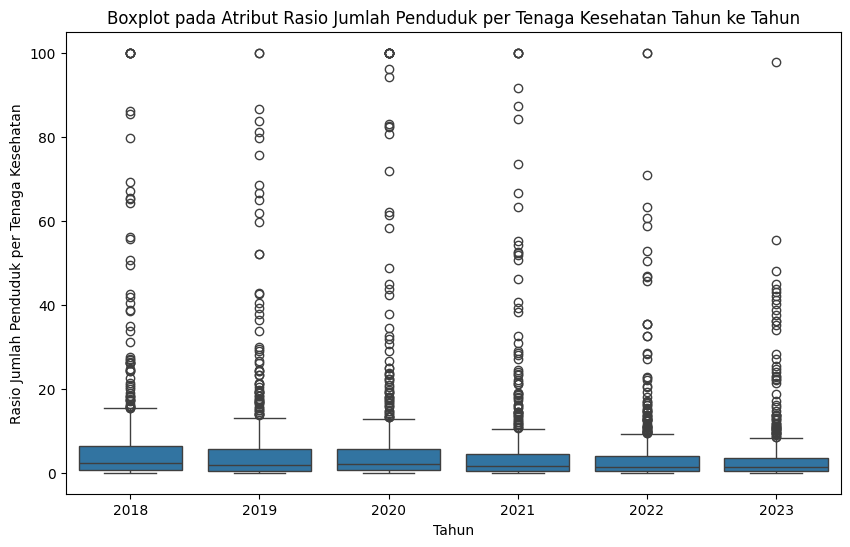

In [166]:
plt.figure(figsize=(10, 6))
sns.boxplot(x='Tahun', y='Rasio Tenaga Kesehatan', data=salinan_skor_gabungan)
plt.title('Boxplot pada Atribut Rasio Jumlah Penduduk per Tenaga Kesehatan Tahun ke Tahun')
plt.xlabel('Tahun')
plt.ylabel('Rasio Jumlah Penduduk per Tenaga Kesehatan')
plt.show()

Gambar ini menunjukkan boxplot distribusi **rasio tenaga kesehatan** dari tahun 2018 hingga 2023. Rasio tenaga kesehatan adalah salah satu faktor penting dalam ketahanan pangan karena berhubungan dengan **akses layanan kesehatan**, **penanganan gizi buruk**, serta **kesehatan ibu dan anak**.  

---

**Analisis Data dalam Konteks Ketahanan Pangan**  

1. **Distribusi Rasio Tenaga Kesehatan**  
   - Nilai median cukup rendah setiap tahunnya, menunjukkan bahwa sebagian besar wilayah memiliki keterbatasan tenaga kesehatan.  
   - Rentang distribusi cukup lebar, dengan beberapa daerah memiliki rasio tenaga kesehatan yang sangat tinggi (*outliers*). Hal ini menunjukkan ketimpangan distribusi tenaga kesehatan antara daerah yang maju dan daerah tertinggal.  
   - Tidak ada perubahan signifikan dalam distribusi dari tahun ke tahun, menunjukkan bahwa peningkatan tenaga kesehatan masih stagnan di beberapa wilayah.  

2. **Dampak terhadap Ketahanan Pangan**  
   - **Akses ke layanan kesehatan mempengaruhi status gizi:**  
     Wilayah dengan rasio tenaga kesehatan rendah cenderung mengalami tingkat gizi buruk yang lebih tinggi, yang berdampak pada ketahanan pangan masyarakat.  
   - **Tenaga kesehatan penting dalam edukasi gizi:**  
     Tenaga kesehatan berperan dalam mengedukasi masyarakat tentang pola makan sehat dan praktik gizi yang baik, yang berkontribusi pada ketahanan pangan individu dan rumah tangga.  
   - **Pengaruh terhadap ibu hamil dan anak-anak:**  
     Wilayah dengan akses tenaga kesehatan yang rendah bisa mengalami angka stunting dan malnutrisi yang lebih tinggi, yang secara langsung menurunkan indeks ketahanan pangan.  

---

**Implikasi untuk Model Prediksi Indeks Ketahanan Pangan**  
Dalam pendekatan **ensemble machine learning**, variabel **rasio tenaga kesehatan** bisa digunakan sebagai faktor prediktor dalam model ketahanan pangan. Hubungan antara tenaga kesehatan dan ketahanan pangan bisa dikombinasikan dengan variabel lain seperti:  
- **Persentase penduduk tanpa akses listrik (indikator infrastruktur dan kesejahteraan)**  
- **Akses air bersih (indikator sanitasi dan kesehatan masyarakat)**  
- **Lama sekolah perempuan (indikator pendidikan dan kesadaran gizi)**  

Dengan memasukkan rasio tenaga kesehatan dalam model, kita bisa meningkatkan akurasi prediksi indeks ketahanan pangan, terutama dalam aspek kesehatan masyarakat dan gizi.

##### Angka Harapan Hidup

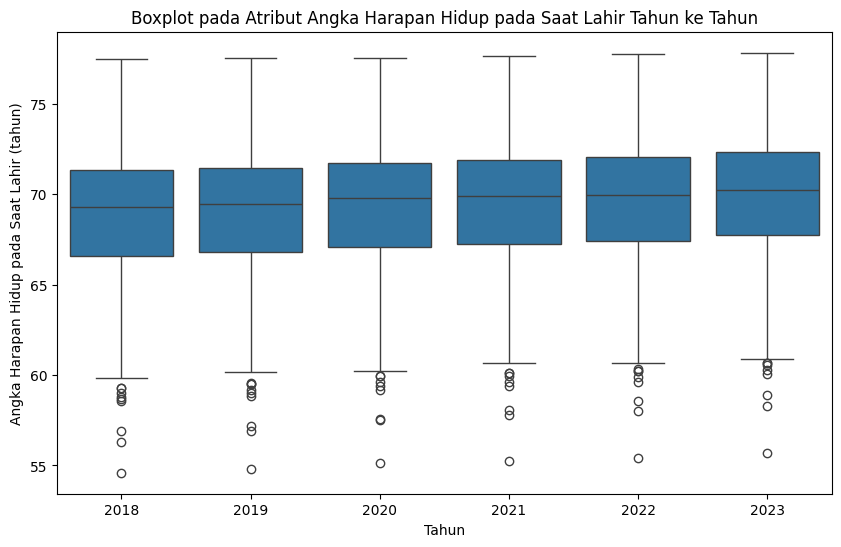

In [167]:
plt.figure(figsize=(10, 6))
sns.boxplot(x='Tahun', y='Angka Harapan Hidup (tahun)', data=salinan_skor_gabungan)
plt.title('Boxplot pada Atribut Angka Harapan Hidup pada Saat Lahir Tahun ke Tahun')
plt.xlabel('Tahun')
plt.ylabel('Angka Harapan Hidup pada Saat Lahir (tahun)')
plt.show()

Gambar ini menunjukkan **boxplot angka harapan hidup di Indonesia** dari tahun 2018 hingga 2023. **Angka harapan hidup** merupakan salah satu indikator penting dalam indeks ketahanan pangan karena mencerminkan kualitas hidup, kesehatan, dan akses terhadap gizi yang baik.  

---

**Analisis Data dalam Konteks Ketahanan Pangan**  

1. **Tren Angka Harapan Hidup**  
   - Median angka harapan hidup relatif stabil di sekitar 70 tahun dari 2018 hingga 2023.  
   - Rentang distribusi data tidak banyak berubah, menunjukkan bahwa tidak ada lonjakan besar dalam angka harapan hidup di berbagai daerah.  
   - Terdapat *outliers* di bagian bawah (sekitar 55-60 tahun), yang mencerminkan daerah-daerah dengan angka harapan hidup rendah akibat faktor kesehatan dan gizi yang buruk.  

2. **Dampak terhadap Ketahanan Pangan**  
   - **Hubungan dengan Ketersediaan Gizi:**  
     Daerah dengan angka harapan hidup rendah sering kali berkorelasi dengan akses pangan yang terbatas, asupan gizi buruk, dan kondisi sanitasi yang tidak memadai.  
   - **Pentingnya Sistem Kesehatan:**  
     Wilayah dengan angka harapan hidup tinggi biasanya memiliki sistem kesehatan yang lebih baik, termasuk akses ke layanan medis dan pola makan yang lebih sehat.  
   - **Kondisi Sosial-Ekonomi:**  
     Angka harapan hidup juga berhubungan dengan kemiskinan dan kesejahteraan ekonomi. Ketahanan pangan yang baik berkontribusi pada kesehatan yang lebih baik, yang akhirnya meningkatkan angka harapan hidup.  

---

**Implikasi untuk Model Prediksi Indeks Ketahanan Pangan**  
Dalam pendekatan **ensemble machine learning**, angka harapan hidup dapat dijadikan sebagai salah satu variabel prediktor dalam model indeks ketahanan pangan. Beberapa hubungannya dengan faktor lain:  
- **Rasio tenaga kesehatan:** Wilayah dengan banyak tenaga kesehatan cenderung memiliki angka harapan hidup lebih tinggi.  
- **Akses air bersih:** Sanitasi dan kebersihan lingkungan berkontribusi pada angka harapan hidup yang lebih tinggi.  
- **Tingkat pendidikan (terutama perempuan):** Pendidikan yang lebih baik berkontribusi pada pola makan sehat dan gizi yang lebih baik.  

Dengan memasukkan **angka harapan hidup** dalam model prediksi, kita dapat lebih akurat mengukur ketahanan pangan dari aspek **kesehatan dan kesejahteraan masyarakat**.  

##### Stunting

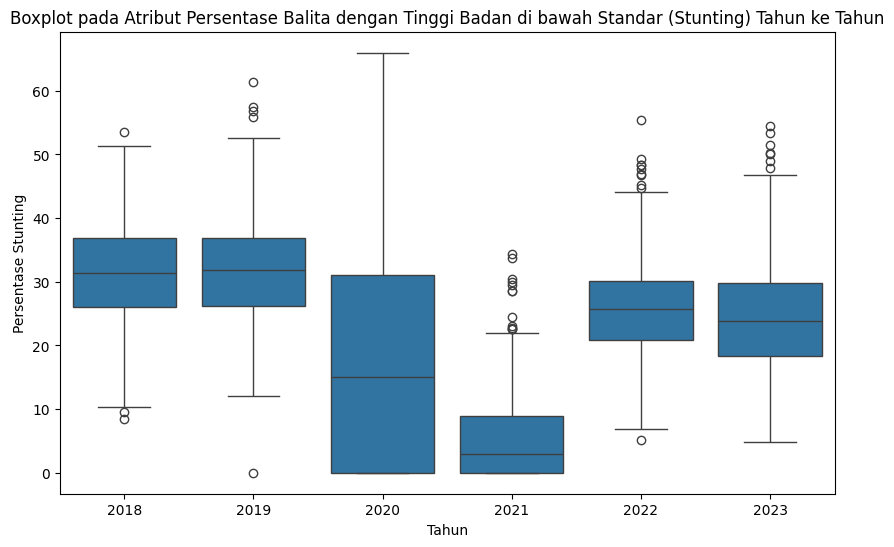

In [168]:
plt.figure(figsize=(10, 6))
sns.boxplot(x='Tahun', y='Stunting (%)', data=salinan_skor_gabungan)
plt.title('Boxplot pada Atribut Persentase Balita dengan Tinggi Badan di bawah Standar (Stunting) Tahun ke Tahun')
plt.xlabel('Tahun')
plt.ylabel('Persentase Stunting')
plt.show()

Gambar ini menunjukkan **boxplot tingkat stunting di Indonesia** dari tahun 2018 hingga 2023. **Stunting** adalah indikator penting dalam menilai ketahanan pangan karena mencerminkan kualitas gizi yang diterima oleh anak-anak, terutama dalam masa pertumbuhan.  

**Analisis Data dalam Konteks Ketahanan Pangan**  

1. **Tren Stunting dari Tahun ke Tahun**  
   - Pada tahun 2018 dan 2019, median tingkat stunting berada di sekitar **30%**, dengan beberapa daerah memiliki angka yang lebih tinggi (>50%).  
   - **Tahun 2020 menunjukkan anomali**, dengan rentang distribusi data yang sangat luas, bahkan ada daerah dengan angka stunting **mendekati 0% dan lebih dari 60%**. Ini bisa jadi akibat **data yang tidak stabil akibat pandemi COVID-19**.  
   - Setelah 2020, distribusi kembali stabil, dengan median stunting turun ke sekitar **20%-30%** pada 2021-2023.  

2. **Dampak terhadap Ketahanan Pangan**  
   - **Ketersediaan pangan bergizi:** Stunting menunjukkan bahwa masih ada daerah yang mengalami keterbatasan akses terhadap makanan bergizi, terutama protein dan mikronutrien.  
   - **Dampak ekonomi dan sosial:** Anak-anak yang mengalami stunting cenderung memiliki **kesehatan yang lebih buruk**, risiko penyakit yang lebih tinggi, serta perkembangan kognitif yang lebih rendah, yang dapat berpengaruh pada produktivitas di masa depan.  
   - **Ketimpangan antar daerah:** Outlier pada boxplot menunjukkan bahwa ada beberapa wilayah dengan tingkat stunting yang masih sangat tinggi, sementara beberapa wilayah lainnya menunjukkan penurunan signifikan.  

---

**Implikasi untuk Model Prediksi Indeks Ketahanan Pangan**  
Stunting bisa menjadi **variabel utama dalam model prediksi indeks ketahanan pangan**. Beberapa hubungan yang bisa dieksplorasi lebih lanjut:  
- **Hubungan dengan angka harapan hidup:** Daerah dengan stunting tinggi cenderung memiliki angka harapan hidup lebih rendah.  
- **Hubungan dengan tenaga kesehatan:** Akses tenaga kesehatan yang lebih baik berkontribusi dalam menurunkan angka stunting melalui edukasi gizi dan layanan kesehatan ibu & anak.  
- **Hubungan dengan lama sekolah perempuan:** Pendidikan ibu sangat berpengaruh terhadap pola asuh dan kecukupan gizi anak.  

---

Kesimpulannya, **penurunan angka stunting menjadi indikator positif untuk ketahanan pangan**, tetapi masih ada daerah yang perlu perhatian lebih dalam aspek ketersediaan pangan dan edukasi gizi.

##### Skor IKP

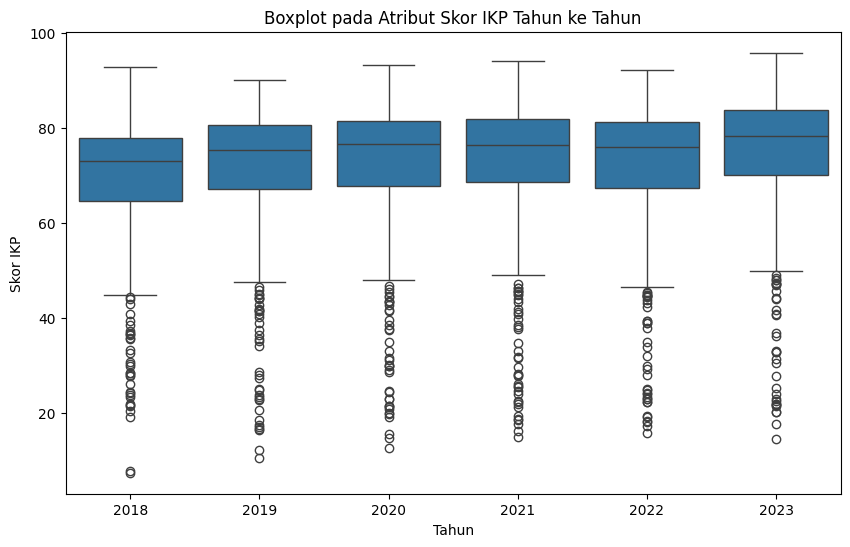

In [169]:
plt.figure(figsize=(10, 6))
sns.boxplot(x='Tahun', y='Skor IKP', data=salinan_skor_gabungan)
plt.title('Boxplot pada Atribut Skor IKP Tahun ke Tahun')
plt.xlabel('Tahun')
plt.ylabel('Skor IKP')
plt.show()

Gambar tersebut adalah diagram kotak (boxplot) yang menunjukkan distribusi nilai **IKP Score** dari tahun 2018 hingga 2023. Berikut adalah analisisnya:

1. **Median Stabil**: Median nilai IKP Score tampaknya konsisten dari tahun ke tahun, dengan sedikit variasi yang menunjukkan bahwa nilai tengah data tidak banyak berubah selama periode ini.

2. **Sebaran Data (IQR)**:
   - Interquartile Range (IQR), atau jarak antara kuartil pertama (Q1) dan kuartil ketiga (Q3), relatif serupa di semua tahun, menunjukkan sebaran data yang stabil di tengah.
   - Rentang nilai dalam kotak (Q1 hingga Q3) menunjukkan mayoritas skor berada dalam rentang ini.

3. **Outlier yang Konsisten**:
   - Ada banyak outlier (ditandai dengan lingkaran di luar garis whisker) di setiap tahun. Ini menunjukkan bahwa ada individu atau data tertentu dengan skor jauh lebih rendah dari mayoritas.
   - Sebaran outlier relatif serupa setiap tahun, yang dapat menunjukkan pola yang konsisten pada kelompok dengan performa rendah.

4. **Rentang Maksimum dan Minimum**:
   - Garis whisker (batas maksimum dan minimum tanpa outlier) berada dalam rentang yang hampir sama setiap tahun, menunjukkan bahwa tidak ada perubahan besar dalam rentang skor tertinggi dan terendah.

5. **Kinerja Stabil**:
   - Nilai IKP Score tidak menunjukkan peningkatan atau penurunan drastis dari tahun ke tahun. Hal ini mungkin mengindikasikan stabilitas dalam sistem atau penilaian yang dilakukan.

#### Cetak Outlier

**Catatan:**
1.   Atribut Outlier yang dideteksi terdiri dari semua atribut, kecuali NCPR karena terdapat pembeda perhitungan antara tingkat Kabupaten dan Kota
2.   Metode yang digunakan untuk penghapusan outlier adalah metode IQR



##### Kemiskinan

In [170]:
# Pengecekan Outlier
# Menghitung Q1, Q3, dan IQR
Q1 = salinan_skor_gabungan['Kemiskinan (%)'].quantile(0.25)
Q3 = salinan_skor_gabungan['Kemiskinan (%)'].quantile(0.75)
IQR = Q3 - Q1

# Menentukan batas bawah dan atas
lower_bound1 = Q1 - 1.5 * IQR
upper_bound1 = Q3 + 1.5 * IQR

# Cetak Outlier
#Kemiskinan_outlier = salinan_skor_gabungan[(salinan_skor_gabungan['Kemiskinan (%)'] < lower_bound1) | (salinan_skor_gabungan['Kemiskinan (%)'] > upper_bound1)]
#Kemiskinan_outlier

In [171]:
# Menghapus outlier dan membuat dataframe baru
#salinan_skor_gabungan = salinan_skor_gabungan[(salinan_skor_gabungan['Kemiskinan (%)'] >= lower_bound1) & (salinan_skor_gabungan['Kemiskinan (%)'] <= upper_bound1)]
#salinan_skor_gabungan

##### Pengeluaran Pangan

In [172]:
# Pengecekan Outlier
# Menghitung Q1, Q3, dan IQR
Q1 = salinan_skor_gabungan['Pengeluaran Pangan (%)'].quantile(0.25)
Q3 = salinan_skor_gabungan['Pengeluaran Pangan (%)'].quantile(0.75)
IQR = Q3 - Q1

# Menentukan batas bawah dan atas
lower_bound2 = Q1 - 1.5 * IQR
upper_bound2 = Q3 + 1.5 * IQR

# Cetak Outlier
#pengeluaranPangan_outlier = salinan_skor_gabungan[(salinan_skor_gabungan['Pengeluaran Pangan (%)'] < lower_bound2) | (salinan_skor_gabungan['Pengeluaran Pangan (%)'] > upper_bound2)]
#pengeluaranPangan_outlier

In [173]:
# Menghapus outlier dan membuat dataframe baru
#salinan_skor_gabungan = salinan_skor_gabungan[(salinan_skor_gabungan['Pengeluaran Pangan (%)'] >= lower_bound2) & (salinan_skor_gabungan['Pengeluaran Pangan (%)'] <= upper_bound2)]
#salinan_skor_gabungan

##### Tanpa Listrik

In [174]:
# Pengecekan Outlier
# Menghitung Q1, Q3, dan IQR
Q1 = salinan_skor_gabungan['Tanpa Listrik (%)'].quantile(0.25)
Q3 = salinan_skor_gabungan['Tanpa Listrik (%)'].quantile(0.75)
IQR = Q3 - Q1

# Menentukan batas bawah dan atas
lower_bound3 = Q1 - 1.5 * IQR
upper_bound3 = Q3 + 1.5 * IQR

# Cetak Outlier
#tanpaListrik_outlier = salinan_skor_gabungan[(salinan_skor_gabungan['Tanpa Listrik (%)'] < lower_bound3) | (salinan_skor_gabungan['Tanpa Listrik (%)'] > upper_bound3)]
#tanpaListrik_outlier

In [175]:
# Menghapus outlier dan membuat dataframe baru
#salinan_skor_gabungan = salinan_skor_gabungan[(salinan_skor_gabungan['Tanpa Listrik (%)'] >= lower_bound3) & (salinan_skor_gabungan['Tanpa Listrik (%)'] <= upper_bound3)]
#salinan_skor_gabungan

##### Tanpa Air Bersih

In [176]:
# Pengecekan Outlier
# Menghitung Q1, Q3, dan IQR
Q1 = salinan_skor_gabungan['Tanpa Air Bersih (%)'].quantile(0.25)
Q3 = salinan_skor_gabungan['Tanpa Air Bersih (%)'].quantile(0.75)
IQR = Q3 - Q1

# Menentukan batas bawah dan atas
lower_bound4 = Q1 - 1.5 * IQR
upper_bound4 = Q3 + 1.5 * IQR

# Cetak Outlier
#tanpaAirBersih_outlier = salinan_skor_gabungan[(salinan_skor_gabungan['Tanpa Air Bersih (%)'] < lower_bound4) | (salinan_skor_gabungan['Tanpa Air Bersih (%)'] > upper_bound4)]
#tanpaAirBersih_outlier

In [177]:
# Menghapus outlier dan membuat dataframe baru
#salinan_skor_gabungan = salinan_skor_gabungan[(salinan_skor_gabungan['Tanpa Air Bersih (%)'] >= lower_bound4) & (salinan_skor_gabungan['Tanpa Air Bersih (%)'] <= upper_bound4)]
#salinan_skor_gabungan

##### Lama Sekolah Perempuan

In [178]:
# Pengecekan Outlier
# Menghitung Q1, Q3, dan IQR
Q1 = salinan_skor_gabungan['Lama Sekolah Perempuan (tahun)'].quantile(0.25)
Q3 = salinan_skor_gabungan['Lama Sekolah Perempuan (tahun)'].quantile(0.75)
IQR = Q3 - Q1

# Menentukan batas bawah dan atas
lower_bound5 = Q1 - 1.5 * IQR
upper_bound5 = Q3 + 1.5 * IQR

# Cetak Outlier
#lsp_outlier = salinan_skor_gabungan[(salinan_skor_gabungan['Lama Sekolah Perempuan (tahun)'] < lower_bound5) | (salinan_skor_gabungan['Lama Sekolah Perempuan (tahun)'] > upper_bound5)]
#lsp_outlier

In [179]:
# Menghapus outlier dan membuat dataframe baru
#salinan_skor_gabungan = salinan_skor_gabungan[(salinan_skor_gabungan['Lama Sekolah Perempuan (tahun)'] >= lower_bound5) & (salinan_skor_gabungan['Lama Sekolah Perempuan (tahun)'] <= upper_bound5)]
#salinan_skor_gabungan

##### Rasio Tenaga Kesehatan

In [180]:
# Pengecekan Outlier
# Menghitung Q1, Q3, dan IQR
Q1 = salinan_skor_gabungan['Rasio Tenaga Kesehatan'].quantile(0.25)
Q3 = salinan_skor_gabungan['Rasio Tenaga Kesehatan'].quantile(0.75)
IQR = Q3 - Q1

# Menentukan batas bawah dan atas
lower_bound6 = Q1 - 1.5 * IQR
upper_bound6 = Q3 + 1.5 * IQR

# Cetak Outlier
#rtk_outlier = salinan_skor_gabungan[(salinan_skor_gabungan['Rasio Tenaga Kesehatan'] < lower_bound6) | (salinan_skor_gabungan['Rasio Tenaga Kesehatan'] > upper_bound6)]
#rtk_outlier

In [181]:
# Menghapus outlier dan membuat dataframe baru
#salinan_skor_gabungan = salinan_skor_gabungan[(salinan_skor_gabungan['Rasio Tenaga Kesehatan'] >= lower_bound6) & (salinan_skor_gabungan['Rasio Tenaga Kesehatan'] <= upper_bound6)]
#salinan_skor_gabungan

##### Angka Harapan Hidup

In [182]:
# Pengecekan Outlier
# Menghitung Q1, Q3, dan IQR
Q1 = salinan_skor_gabungan['Angka Harapan Hidup (tahun)'].quantile(0.25)
Q3 = salinan_skor_gabungan['Angka Harapan Hidup (tahun)'].quantile(0.75)
IQR = Q3 - Q1

# Menentukan batas bawah dan atas
lower_bound7 = Q1 - 1.5 * IQR
upper_bound7 = Q3 + 1.5 * IQR

# Cetak Outlier
#ahh_outlier = salinan_skor_gabungan[(salinan_skor_gabungan['Angka Harapan Hidup (tahun)'] < lower_bound7) | (salinan_skor_gabungan['Angka Harapan Hidup (tahun)'] > upper_bound7)]
#ahh_outlier

In [183]:
# Menghapus outlier dan membuat dataframe baru
#salinan_skor_gabungan = salinan_skor_gabungan[(salinan_skor_gabungan['Angka Harapan Hidup (tahun)'] >= lower_bound7) & (salinan_skor_gabungan['Angka Harapan Hidup (tahun)'] <= upper_bound7)]
#salinan_skor_gabungan

##### Stunting

In [184]:
# Pengecekan Outlier
# Menghitung Q1, Q3, dan IQR
Q1 = salinan_skor_gabungan['Stunting (%)'].quantile(0.25)
Q3 = salinan_skor_gabungan['Stunting (%)'].quantile(0.75)
IQR = Q3 - Q1

# Menentukan batas bawah dan atas
lower_bound8 = Q1 - 1.5 * IQR
upper_bound8 = Q3 + 1.5 * IQR

# Cetak Outlier
#stunting_outlier = salinan_skor_gabungan[(salinan_skor_gabungan['Stunting (%)'] < lower_bound8) | (salinan_skor_gabungan['Stunting (%)'] > upper_bound8)]
#stunting_outlier

In [185]:
# Menghapus outlier dan membuat dataframe baru
#salinan_skor_gabungan = salinan_skor_gabungan[(salinan_skor_gabungan['Stunting (%)'] >= lower_bound8) & (salinan_skor_gabungan['Stunting (%)'] <= upper_bound8)]
#salinan_skor_gabungan

##### Skor IKP

In [186]:
# Pengecekan Outlier
# Menghitung Q1, Q3, dan IQR
Q1 = salinan_skor_gabungan['Skor IKP'].quantile(0.25)
Q3 = salinan_skor_gabungan['Skor IKP'].quantile(0.75)
IQR = Q3 - Q1

# Menentukan batas bawah dan atas
lower_bound9 = Q1 - 1.5 * IQR
upper_bound9 = Q3 + 1.5 * IQR

# Cetak Outlier
#stunting_outlier = salinan_skor_gabungan[(salinan_skor_gabungan['Skor IKP'] < lower_bound9) | (salinan_skor_gabungan['Skor IKP'] > upper_bound9)]
#stunting_outlier

In [187]:
# Menghapus outlier dan membuat dataframe baru
#salinan_skor_gabungan = salinan_skor_gabungan[(salinan_skor_gabungan['Skor IKP'] >= lower_bound9) & (salinan_skor_gabungan['Skor IKP'] <= upper_bound9)]
salinan_skor_gabungan

,Wilayah,Tahun,NCPR,Kemiskinan (%),Pengeluaran Pangan (%),Tanpa Listrik (%),Tanpa Air Bersih (%),Lama Sekolah Perempuan (tahun),Rasio Tenaga Kesehatan,Angka Harapan Hidup (tahun),Stunting (%),Skor IKP
0,Kabupaten Aceh Barat,2018,0.42,20.28,42.10,2.29,33.76,9.38,2.32,67.62,33.2,75.45
1,Kabupaten Aceh Barat Daya,2018,0.59,18.31,51.54,0.95,45.10,8.92,1.95,64.51,31.6,71.29
2,Kabupaten Aceh Besar,2018,0.55,15.41,54.60,0.82,26.99,9.64,1.78,69.52,31.2,77.77
3,Kabupaten Aceh Jaya,2018,0.25,14.85,52.83,0.00,42.31,8.42,7.44,66.77,38.3,74.67
4,Kabupaten Aceh Selatan,2018,0.69,14.07,69.08,0.50,53.23,8.41,5.49,63.89,44.9,67.24
...,...,...,...,...,...,...,...,...,...,...,...,...
509,Kota Ternate,2023,0.00,3.11,5.23,0.00,5.95,11.82,0.01,71.38,13.8,89.51
510,Kota Tidore Kepulauan,2023,0.00,5.99,11.81,0.16,32.73,10.60,0.02,69.75,14.3,65.83
511,Kota Tomohon,2023,0.00,5.26,21.31,0.00,18.85,8.80,9.84,72.44,31.1,83.14
512,Kota Tual,2023,0.00,20.56,6.80,1.70,17.90,10.98,0.01,66.16,16.4,54.91


#### Mengecek Jumlah Data IKP setiap tahun dan Balancing Dataset

In [188]:
# Menghitung jumlah data pada setiap tahunnya
tahun_counts = salinan_skor_gabungan.groupby('Tahun').size()

# Mencetak Hasil
tahun_counts

,0
Tahun,
2018,514
2019,514
2020,514
2021,514
2022,514
2023,514


In [189]:
# Menyeimbangkan jumlah dataset pada setiap tahunnya
def balance_dataset(df, target_column='Tahun'):
    if target_column not in df.columns:
      print(f"Error: Target column '{target_column}' not found in the DataFrame.")
      return None

    # Menghitung jumlah data pada setiap tahunnya
    counts = df[target_column].value_counts()
    min_count = min(counts)  # Menghitung nilai minimum dari jumlah data pada setiap tahunnya untuk dilakukan balancing

    balanced_df = pd.DataFrame()

    # Iterate through each unique value in the target column
    for value in counts.index:
        # Sample the data for the current value to the minimum count
        subset = df[df[target_column] == value].sample(n=min_count, random_state=42) # random_state for reproducibility
        balanced_df = pd.concat([balanced_df, subset], ignore_index=True)

    return balanced_df

# Contoh Penggunaan
balanced_data = balance_dataset(salinan_skor_gabungan)

if balanced_data is not None:
    # Verify the balance
    print(balanced_data['Tahun'].value_counts())
    salinan_skor_gabungan = balanced_data # Assign back to the original variable name

Tahun
2018    514
2019    514
2020    514
2021    514
2022    514
2023    514
Name: count, dtype: int64


In [190]:
salinan_skor_gabungan.head()

,Wilayah,Tahun,NCPR,Kemiskinan (%),Pengeluaran Pangan (%),Tanpa Listrik (%),Tanpa Air Bersih (%),Lama Sekolah Perempuan (tahun),Rasio Tenaga Kesehatan,Angka Harapan Hidup (tahun),Stunting (%),Skor IKP
0,Kabupaten Pidie,2018,0.50,21.43,64.65,1.96,52.11,8.87,1.18,66.58,43.7,67.97
1,Kota Sukabumi,2018,50.00,8.48,48.76,0.34,27.51,9.42,0.03,71.95,23.1,67.32
2,Kota Depok,2018,50.00,2.34,41.68,0.00,23.66,10.46,0.05,74.04,14.9,83.39
3,Kabupaten Kepulauan Sangihe,2018,4.32,11.80,62.98,6.49,55.11,8.57,0.86,69.35,22.2,50.96
4,Kota Surabaya,2018,50.00,5.39,39.88,0.00,2.70,9.45,0.04,73.88,22.8,84.44


### Label Encoder

In [191]:
w_encoder = LabelEncoder()

salinan_skor_gabungan['Wilayah'] = w_encoder.fit_transform(salinan_skor_gabungan['Wilayah'])

In [192]:
salinan_skor_gabungan.head()

,Wilayah,Tahun,NCPR,Kemiskinan (%),Pengeluaran Pangan (%),Tanpa Listrik (%),Tanpa Air Bersih (%),Lama Sekolah Perempuan (tahun),Rasio Tenaga Kesehatan,Angka Harapan Hidup (tahun),Stunting (%),Skor IKP
0,304,2018,0.50,21.43,64.65,1.96,52.11,8.87,1.18,66.58,43.7,67.97
1,504,2018,50.00,8.48,48.76,0.34,27.51,9.42,0.03,71.95,23.1,67.32
2,441,2018,50.00,2.34,41.68,0.00,23.66,10.46,0.05,74.04,14.9,83.39
3,153,2018,4.32,11.80,62.98,6.49,55.11,8.57,0.86,69.35,22.2,50.96
4,506,2018,50.00,5.39,39.88,0.00,2.70,9.45,0.04,73.88,22.8,84.44


### Feature Scaling

In [193]:
#Load Normalisasi Data
mc = MinMaxScaler()

In [194]:
#Normalisasi Data
salinan_skor_gabungan = mc.fit_transform(salinan_skor_gabungan)
salinan_skor_gabungan = pd.DataFrame(salinan_skor_gabungan, columns = selected_features)
salinan_skor_gabungan.head()

,Wilayah,Tahun,NCPR,Kemiskinan (%),Pengeluaran Pangan (%),Tanpa Listrik (%),Tanpa Air Bersih (%),Lama Sekolah Perempuan (tahun),Rasio Tenaga Kesehatan,Angka Harapan Hidup (tahun),Stunting (%),Skor IKP
0,0.584615,0.0,0.0100,0.470574,0.669407,0.0196,0.5211,0.641925,0.0118,0.515935,0.662222,0.685252
1,0.969231,0.0,1.0000,0.162020,0.504058,0.0034,0.2751,0.686786,0.0003,0.747201,0.350053,0.677901
2,0.848077,0.0,1.0000,0.015726,0.430385,0.0000,0.2366,0.771615,0.0005,0.837209,0.225792,0.859647
3,0.294231,0.0,0.0864,0.241125,0.652029,0.0649,0.5511,0.617455,0.0086,0.635228,0.336415,0.492875
4,0.973077,0.0,1.0000,0.088396,0.411655,0.0000,0.0270,0.689233,0.0004,0.830319,0.345507,0.871522


###Preparation Data

####Memisah antara Variabel Independen dengan Variabel Dependen

In [195]:
X = salinan_skor_gabungan[features]
y = salinan_skor_gabungan['Skor IKP']

####Splitting Data

In [196]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 42)
a,b = X_train.shape
c,d = X_test.shape
print("Jumlah Data Latih:", a)
print("Jumlah Data Uji:", c)

Jumlah Data Latih: 2158
Jumlah Data Uji: 926


# Prediksi

## Data Latih

### Regresi Linear

In [197]:
lr = LinearRegression()
lr.fit(X_train, y_train)
pred_train = lr.predict(X_train)

In [198]:
print('MAE:', metrics.mean_absolute_error(y_train, pred_train))
mse = metrics.mean_squared_error(y_train, pred_train)
print('RMSE:', np.sqrt(mse))
print('R-squared:', r2_score(y_train, pred_train))

MAE: 0.06924419213469116
RMSE: 0.09229909823870318
R-squared: 0.6791940948080157


### Random Forest

In [199]:
rf = RandomForestRegressor()
rf.fit(X_train, y_train)
pred_train1 = rf.predict(X_train)

In [200]:
print('MAE:', metrics.mean_absolute_error(y_train, pred_train1))
mse = metrics.mean_squared_error(y_train, pred_train1)
print('RMSE:', np.sqrt(mse))
print('R-squared:', r2_score(y_train, pred_train1))

MAE: 0.006716881620054612
RMSE: 0.010688395415367556
R-squared: 0.9956979796335645


### Extreme Gradient Boosting

In [201]:
ExGB = xgb.XGBRegressor()
ExGB.fit(X_train, y_train)
pred_train2 = ExGB.predict(X_train)

In [202]:
print('MAE:', metrics.mean_absolute_error(y_train, pred_train2))
mse = metrics.mean_squared_error(y_train, pred_train2)
print('RMSE:', np.sqrt(mse))
print('R-squared:', r2_score(y_train, pred_train2))

MAE: 0.00165673894870387
RMSE: 0.0022571338161964786
R-squared: 0.9998081498899434


### LASSO Regression

In [203]:
lasso = linear_model.Lasso()
lasso.fit(X_train, y_train)
pred_train3 = lasso.predict(X_train)

In [204]:
print('MAE:', metrics.mean_absolute_error(y_train, pred_train3))
mse = metrics.mean_squared_error(y_train, pred_train3)
print('RMSE:', np.sqrt(mse))
print('R-squared:', r2_score(y_train, pred_train3))

MAE: 0.11774136456430805
RMSE: 0.1629582233178195
R-squared: 0.0


### Support Vector Regression (SVR)

In [205]:
svr = SVR()
svr.fit(X_train, y_train)
pred_train4 = svr.predict(X_train)

In [206]:
print('MAE:', metrics.mean_absolute_error(y_train, pred_train4))
mse = metrics.mean_squared_error(y_train, pred_train4)
print('RMSE:', np.sqrt(mse))
print('R-squared:', r2_score(y_train, pred_train4))

MAE: 0.059942730253579796
RMSE: 0.06709301761036153
R-squared: 0.8304873596110287


### Ensemble Machine Learning (Average Method)

In [207]:
finalTrainPred= (pred_train + pred_train1 + pred_train2 + pred_train3 + pred_train4)/5.0

In [208]:
print('MAE:', metrics.mean_absolute_error(y_train, finalTrainPred))
mse = metrics.mean_squared_error(y_train, finalTrainPred)
print('RMSE:', np.sqrt(mse))
print('R-squared:', r2_score(y_train, finalTrainPred))

MAE: 0.04573928073813669
RMSE: 0.057408101530967995
R-squared: 0.875893705708464


### Ensemble Machine Learning (Voting Regression)

In [209]:
voting_regressor = VotingRegressor([('Multiple Linear Regression', lr), ('Random Forest Regression', rf), ('Extreme Gradient Boosting', ExGB), ('Support Vector Regression', svr), ('LASSO Regression', lasso)])
voting_regressor.fit(X_train, y_train)
final_train = voting_regressor.predict(X_train)

In [210]:
print('MAE:', metrics.mean_absolute_error(y_train, final_train))
mse = metrics.mean_squared_error(y_train, final_train)
print('RMSE:', np.sqrt(mse))
print('R-squared:', r2_score(y_train, final_train))

MAE: 0.045748574249552684
RMSE: 0.05741029899012481
R-squared: 0.8758842044804117


### Hyperparameter Tuning

#### Regresi Linear

In [211]:
lr = LinearRegression(fit_intercept=True)
lr.fit(X_train, y_train)
pred_train = lr.predict(X_train)

In [212]:
print('MAE:', metrics.mean_absolute_error(y_train, pred_train))
mse = metrics.mean_squared_error(y_train, pred_train)
print('RMSE:', np.sqrt(mse))
print('R-squared:', r2_score(y_train, pred_train))

MAE: 0.06924419213469116
RMSE: 0.09229909823870318
R-squared: 0.6791940948080157


#### Random Forest

In [213]:
rf = RandomForestRegressor(max_depth=None, min_samples_split=2, n_estimators=300)
rf.fit(X_train, y_train)
pred_train1 = rf.predict(X_train)

In [214]:
print('MAE:', metrics.mean_absolute_error(y_train, pred_train1))
mse = metrics.mean_squared_error(y_train, pred_train1)
print('RMSE:', np.sqrt(mse))
print('R-squared:', r2_score(y_train, pred_train1))

MAE: 0.006570069186320255
RMSE: 0.01055614065559789
R-squared: 0.9958037845870243


#### Extreme Gradient Boosting

In [215]:
ExGB = xgb.XGBRegressor(learning_rate=0.1, max_depth=3, n_estimators=300)
ExGB.fit(X_train, y_train)
pred_train2 = ExGB.predict(X_train)

In [216]:
print('MAE:', metrics.mean_absolute_error(y_train, pred_train2))
mse = metrics.mean_squared_error(y_train, pred_train2)
print('RMSE:', np.sqrt(mse))
print('R-squared:', r2_score(y_train, pred_train2))

MAE: 0.008864403196417696
RMSE: 0.012027053786183907
R-squared: 0.994552892524885


#### LASSO Regression

In [217]:
lasso = linear_model.Lasso(alpha=0.1, max_iter=1000)
lasso.fit(X_train, y_train)
pred_train3 = lasso.predict(X_train)

In [218]:
print('MAE:', metrics.mean_absolute_error(y_train, pred_train3))
mse = metrics.mean_squared_error(y_train, pred_train3)
print('RMSE:', np.sqrt(mse))
print('R-squared:', r2_score(y_train, pred_train3))

MAE: 0.11774136456430805
RMSE: 0.1629582233178195
R-squared: 0.0


#### Support Vector Regression (SVR)

In [219]:
svr = SVR(C=10, kernel="rbf", gamma='scale')
svr.fit(X_train, y_train)
pred_train4 = svr.predict(X_train)

In [220]:
print('MAE:', metrics.mean_absolute_error(y_train, pred_train4))
mse = metrics.mean_squared_error(y_train, pred_train4)
print('RMSE:', np.sqrt(mse))
print('R-squared:', r2_score(y_train, pred_train4))

MAE: 0.04567219975407317
RMSE: 0.0540496410423147
R-squared: 0.8899897716915374


#### Ensemble Machine Learning (Voting Regression)

In [221]:
voting_regressor = VotingRegressor([('Multiple Linear Regression', lr), ('Random Forest Regression', rf), ('Extreme Gradient Boosting', ExGB), ('Support Vector Regression', svr), ('LASSO Regression', lasso)])
voting_regressor.fit(X_train, y_train)
final_train = voting_regressor.predict(X_train)

In [222]:
print('MAE:', metrics.mean_absolute_error(y_train, final_train))
mse = metrics.mean_squared_error(y_train, final_train)
print('RMSE:', np.sqrt(mse))
print('R-squared:', r2_score(y_train, final_train))

MAE: 0.042390789641093884
RMSE: 0.05444667994181339
R-squared: 0.8883676048932578


## Data Uji

### Regresi Linear

In [223]:
lr = LinearRegression()
lr.fit(X_train, y_train)
pred = lr.predict(X_test)

In [224]:
#Cetak Persamaan Garis
print("y = ", lr.coef_, "+", lr.intercept_)

y =  [-0.01914424 -0.00494715 -0.11630825 -0.24379978  0.0406737  -0.35166592
 -0.22949389 -0.12597995 -0.17642202  0.26452393  0.03603258] + 0.7915281614591408


In [225]:
print('MAE:', metrics.mean_absolute_error(y_test, pred))
mse = metrics.mean_squared_error(y_test, pred)
print('RMSE:', np.sqrt(mse))
print('R-squared:', r2_score(y_test, pred))

MAE: 0.07315338765661784
RMSE: 0.09686527313105467
R-squared: 0.6602743991708513


### Random Forest

In [226]:
rf = RandomForestRegressor()
rf.fit(X_train, y_train)
pred1 = rf.predict(X_test)

In [227]:
print('MAE:', metrics.mean_absolute_error(y_test, pred1))
mse = metrics.mean_squared_error(y_test, pred1)
print('RMSE:', np.sqrt(mse))
print('R-squared:', r2_score(y_test, pred1))

MAE: 0.020379163016879493
RMSE: 0.03330114555321028
R-squared: 0.9598477018572552


### Extreme Gradient Boosting

In [228]:
ExGB = xgb.XGBRegressor()
ExGB.fit(X_train, y_train)
pred2 = ExGB.predict(X_test)

In [229]:
print('MAE:', metrics.mean_absolute_error(y_test, pred2))
mse = metrics.mean_squared_error(y_test, pred2)
print('RMSE:', np.sqrt(mse))
print('R-squared:', r2_score(y_test, pred2))

MAE: 0.018280874824826873
RMSE: 0.028950995097718743
R-squared: 0.9696527702761673


### LASSO Regression

In [230]:
lasso = linear_model.Lasso()
lasso.fit(X_train, y_train)
pred3 = lasso.predict(X_test)

In [231]:
print('MAE:', metrics.mean_absolute_error(y_test, pred3))
mse = metrics.mean_squared_error(y_test, pred3)
print('RMSE:', np.sqrt(mse))
print('R-squared:', r2_score(y_test, pred3))

MAE: 0.11905573393081953
RMSE: 0.16631295070797963
R-squared: -0.001484422058281254


### Support Vector Regression (SVR)

In [232]:
svr = SVR()
svr.fit(X_train, y_train)
pred4 = svr.predict(X_test)

In [233]:
print('MAE:', metrics.mean_absolute_error(y_test, pred4))
mse = metrics.mean_squared_error(y_test, pred4)
print('RMSE:', np.sqrt(mse))
print('R-squared:', r2_score(y_test, pred4))

MAE: 0.06266049215593705
RMSE: 0.07143595814776899
R-squared: 0.8152324037120173


### Ensemble Machine Learning (Average Method)

In [234]:
finalPred= (pred + pred1 + pred2 + pred3 + pred4)/5.0

In [235]:
print('MAE:', metrics.mean_absolute_error(y_test, finalPred))
mse = metrics.mean_squared_error(y_test, finalPred)
print('RMSE:', np.sqrt(mse))
print('R-squared:', r2_score(y_test, finalPred))

MAE: 0.04983514532772534
RMSE: 0.06438655228241617
R-squared: 0.8498994092226948


### Ensemble Machine Learning (Voting Regression)

In [236]:
voting_regressor = VotingRegressor([('Multiple Linear Regression', lr), ('Random Forest Regression', rf), ('Extreme Gradient Boosting', ExGB), ('Support Vector Regression', svr), ('LASSO Regression', lasso)])
voting_regressor.fit(X_train, y_train)
final_test = voting_regressor.predict(X_test)

In [237]:
print('MAE:', metrics.mean_absolute_error(y_test, final_test))
mse = metrics.mean_squared_error(y_test, final_test)
print('RMSE:', np.sqrt(mse))
print('R-squared:', r2_score(y_test, final_test))

MAE: 0.04981347189392383
RMSE: 0.06443776597576699
R-squared: 0.8496605313019333


### Hyperparameter Tuning

#### Regresi Linear

In [238]:
lr = LinearRegression(fit_intercept=True)
lr.fit(X_train, y_train)
pred_train = lr.predict(X_test)

In [239]:
print('MAE:', metrics.mean_absolute_error(y_test, pred))
mse = metrics.mean_squared_error(y_test, pred)
print('RMSE:', np.sqrt(mse))
print('R-squared:', r2_score(y_test, pred))

MAE: 0.07315338765661784
RMSE: 0.09686527313105467
R-squared: 0.6602743991708513


#### Random Forest

In [240]:
rf = RandomForestRegressor(max_depth=None, min_samples_split=2, n_estimators=300)
rf.fit(X_train, y_train)
pred1 = rf.predict(X_test)

In [241]:
print('MAE:', metrics.mean_absolute_error(y_test, pred1))
mse = metrics.mean_squared_error(y_test, pred1)
print('RMSE:', np.sqrt(mse))
print('R-squared:', r2_score(y_test, pred1))

MAE: 0.01998417584182042
RMSE: 0.03339028117567412
R-squared: 0.9596324666213472


#### Extreme Gradient Boosting

In [242]:
ExGB = xgb.XGBRegressor(learning_rate=0.1, max_depth=3, n_estimators=300)
ExGB.fit(X_train, y_train)
pred2 = ExGB.predict(X_test)

In [243]:
print('MAE:', metrics.mean_absolute_error(y_test, pred2))
mse = metrics.mean_squared_error(y_test, pred2)
print('RMSE:', np.sqrt(mse))
print('R-squared:', r2_score(y_test, pred2))

MAE: 0.01565018153342839
RMSE: 0.02377368922115932
R-squared: 0.9795362499340494


#### LASSO Regression

In [244]:
lasso = linear_model.Lasso(alpha=0.1, max_iter=1000)
lasso.fit(X_train, y_train)
pred3 = lasso.predict(X_test)

In [245]:
print('MAE:', metrics.mean_absolute_error(y_test, pred3))
mse = metrics.mean_squared_error(y_test, pred3)
print('RMSE:', np.sqrt(mse))
print('R-squared:', r2_score(y_test, pred3))

MAE: 0.11905573393081953
RMSE: 0.16631295070797963
R-squared: -0.001484422058281254


#### Support Vector Regression (SVR)

In [246]:
svr = SVR(C=10, kernel="rbf", gamma='scale')
svr.fit(X_train, y_train)
pred4 = svr.predict(X_test)

In [247]:
print('MAE:', metrics.mean_absolute_error(y_test, pred4))
mse = metrics.mean_squared_error(y_test, pred4)
print('RMSE:', np.sqrt(mse))
print('R-squared:', r2_score(y_test, pred4))

MAE: 0.04831839222829958
RMSE: 0.05939152987887632
R-squared: 0.8722852417529982


#### Ensemble Machine Learning (Voting Regression)

In [248]:
voting_regressor = VotingRegressor([('Multiple Linear Regression', lr), ('Random Forest Regression', rf), ('Extreme Gradient Boosting', ExGB), ('Support Vector Regression', svr), ('LASSO Regression', lasso)])
voting_regressor.fit(X_train, y_train)
final_test = voting_regressor.predict(X_test)

In [249]:
print('MAE:', metrics.mean_absolute_error(y_test, final_test))
mse = metrics.mean_squared_error(y_test, final_test)
print('RMSE:', np.sqrt(mse))
print('R-squared:', r2_score(y_test, final_test))

MAE: 0.04582930594329337
RMSE: 0.060163068029871
R-squared: 0.8689454779787893


# Prediksi (dengan Cross-validation)

In [250]:
# Tentukan jumlah fold
k = 5
kf = KFold(n_splits=k, shuffle=True, random_state=42)

## Regresi Linear

In [251]:
# Hitung skor dengan cross_val_score menggunakan evaluasi r-squared
r2_scores = cross_val_score(lr, X, y, cv=kf, scoring='r2')

# Tampilkan hasil
print(f"R2 per fold: {r2_scores}")
print(f"Rata-rata R2: {np.mean(r2_scores)}")

R2 per fold: [0.67281489 0.62589057 0.67687978 0.68587296 0.67722082]
Rata-rata R2: 0.6677358045668388


In [252]:
# Hitung skor dengan cross_val_score menggunakan root mean squared error (RMSE)
scores = cross_val_score(lr, X, y, cv=kf, scoring='neg_root_mean_squared_error')

# Konversi skor negatif ke positif
rmse_scores = -scores

# Tampilkan hasil
print(f"RMSE per fold: {rmse_scores}")
print(f"Rata-rata RMSE: {np.mean(rmse_scores)}")

RMSE per fold: [0.09816601 0.09343773 0.09804184 0.08968735 0.0918746 ]
Rata-rata RMSE: 0.09424150698569925


In [253]:
# Hitung skor dengan cross_val_score menggunakan Mean Absolute Error (MAE)
scores = cross_val_score(lr, X, y, cv=kf, scoring='neg_mean_absolute_error')

# Konversi skor negatif ke positif
mae_scores = -scores

# Tampilkan hasil
print(f"MAE setiap fold: {mae_scores}")
print(f"Rata-rata MAE: {np.mean(mae_scores)}")

MAE setiap fold: [0.07323323 0.07275609 0.0724782  0.06667647 0.07001051]
Rata-rata MAE: 0.0710309014553823


## Random Forest

In [254]:
# Hitung skor dengan cross_val_score menggunakan evaluasi r-squared
r2_scores = cross_val_score(rf, X, y, cv=kf, scoring='r2')

# Tampilkan hasil
print(f"R2 per fold: {r2_scores}")
print(f"Rata-rata R2: {np.mean(r2_scores)}")

R2 per fold: [0.95820721 0.96834074 0.97790524 0.97202232 0.97182503]
Rata-rata R2: 0.9696601105271279


In [255]:
# Hitung skor dengan cross_val_score menggunakan root mean squared error (RMSE)
scores = cross_val_score(rf, X, y, cv=kf, scoring='neg_root_mean_squared_error')

# Konversi skor negatif ke positif
rmse_scores = -scores

# Tampilkan hasil
print(f"RMSE per fold: {rmse_scores}")
print(f"Rata-rata RMSE: {np.mean(rmse_scores)}")

RMSE per fold: [0.03481747 0.02707307 0.02596135 0.02683777 0.02735183]
Rata-rata RMSE: 0.02840829973185044


In [256]:
# Hitung skor dengan cross_val_score menggunakan Mean Absolute Error (MAE)
scores = cross_val_score(rf, X, y, cv=kf, scoring='neg_mean_absolute_error')

# Konversi skor negatif ke positif
mae_scores = -scores

# Tampilkan hasil
print(f"MAE setiap fold: {mae_scores}")
print(f"Rata-rata MAE: {np.mean(mae_scores)}")

MAE setiap fold: [0.01993823 0.01755417 0.01677634 0.01678003 0.01783865]
Rata-rata MAE: 0.01777748479878257


## Extreme Gradient Boosting

In [257]:
# Hitung skor dengan cross_val_score menggunakan evaluasi r-squared
r2_scores = cross_val_score(ExGB, X, y, cv=kf, scoring='r2')

# Tampilkan hasil
print(f"R2 per fold: {r2_scores}")
print(f"Rata-rata R2: {np.mean(r2_scores)}")

R2 per fold: [0.98099973 0.97839361 0.98534292 0.98329211 0.98125576]
Rata-rata R2: 0.9818568259642799


In [258]:
# Hitung skor dengan cross_val_score menggunakan root mean squared error (RMSE)
scores = cross_val_score(ExGB, X, y, cv=kf, scoring='neg_root_mean_squared_error')

# Konversi skor negatif ke positif
rmse_scores = -scores

# Tampilkan hasil
print(f"RMSE per fold: {rmse_scores}")
print(f"Rata-rata RMSE: {np.mean(rmse_scores)}")

RMSE per fold: [0.02365616 0.02245505 0.02088109 0.02068423 0.02213995]
Rata-rata RMSE: 0.021963295840463155


In [259]:
# Hitung skor dengan cross_val_score menggunakan Mean Absolute Error (MAE)
scores = cross_val_score(ExGB, X, y, cv=kf, scoring='neg_mean_absolute_error')

# Konversi skor negatif ke positif
mae_scores = -scores

# Tampilkan hasil
print(f"MAE setiap fold: {mae_scores}")
print(f"Rata-rata MAE: {np.mean(mae_scores)}")

MAE setiap fold: [0.01543955 0.0151602  0.01460045 0.01409784 0.01527718]
Rata-rata MAE: 0.014915043146875182


## LASSO Regression

In [260]:
# Hitung skor dengan cross_val_score menggunakan evaluasi r-squared
r2_scores = cross_val_score(lasso, X, y, cv=kf, scoring='r2')

# Tampilkan hasil
print(f"R2 per fold: {r2_scores}")
print(f"Rata-rata R2: {np.mean(r2_scores)}")

R2 per fold: [-1.89992395e-03 -9.03106520e-05 -1.16195147e-03 -2.48496669e-04
 -3.37665575e-03]
Rata-rata R2: -0.0013554676981217817


In [261]:
# Hitung skor dengan cross_val_score menggunakan root mean squared error (RMSE)
scores = cross_val_score(lasso, X, y, cv=kf, scoring='neg_root_mean_squared_error')

# Konversi skor negatif ke positif
rmse_scores = -scores

# Tampilkan hasil
print(f"RMSE per fold: {rmse_scores}")
print(f"Rata-rata RMSE: {np.mean(rmse_scores)}")

RMSE per fold: [0.17178156 0.15277157 0.17257646 0.16004146 0.16198497]
Rata-rata RMSE: 0.163831204502943


In [262]:
# Hitung skor dengan cross_val_score menggunakan Mean Absolute Error (MAE)
scores = cross_val_score(lasso, X, y, cv=kf, scoring='neg_mean_absolute_error')

# Konversi skor negatif ke positif
mae_scores = -scores

# Tampilkan hasil
print(f"MAE setiap fold: {mae_scores}")
print(f"Rata-rata MAE: {np.mean(mae_scores)}")

MAE setiap fold: [0.120655   0.11232465 0.12524562 0.11560935 0.11969741]
Rata-rata MAE: 0.11870640755716773


## Support Vector Regression (SVR)

In [263]:
# Hitung skor dengan cross_val_score menggunakan evaluasi r-squared
r2_scores = cross_val_score(svr, X, y, cv=kf, scoring='r2')

# Tampilkan hasil
print(f"R2 per fold: {r2_scores}")
print(f"Rata-rata R2: {np.mean(r2_scores)}")

R2 per fold: [0.87854177 0.86666149 0.89744694 0.86803467 0.88229905]
Rata-rata R2: 0.8785967840529059


In [264]:
# Hitung skor dengan cross_val_score menggunakan root mean squared error (RMSE)
scores = cross_val_score(svr, X, y, cv=kf, scoring='neg_root_mean_squared_error')

# Konversi skor negatif ke positif
rmse_scores = -scores

# Tampilkan hasil
print(f"RMSE per fold: {rmse_scores}")
print(f"Rata-rata RMSE: {np.mean(rmse_scores)}")

RMSE per fold: [0.05981056 0.05578285 0.05523365 0.05813109 0.05547952]
Rata-rata RMSE: 0.056887533734534


In [265]:
# Hitung skor dengan cross_val_score menggunakan Mean Absolute Error (MAE)
scores = cross_val_score(svr, X, y, cv=kf, scoring='neg_mean_absolute_error')

# Konversi skor negatif ke positif
mae_scores = -scores

# Tampilkan hasil
print(f"MAE setiap fold: {mae_scores}")
print(f"Rata-rata MAE: {np.mean(mae_scores)}")

MAE setiap fold: [0.04878041 0.04508949 0.04384327 0.04630908 0.04449705]
Rata-rata MAE: 0.045703860923940784


## Ensemble Machine Learning (Voting Regression)

In [266]:
voting_regressor = VotingRegressor([('Multiple Linear Regression', lr), ('Random Forest Regression', rf), ('Extreme Gradient Boosting', ExGB), ('Support Vector Regression', svr), ('LASSO Regression', lasso)])

In [267]:
# Hitung skor dengan cross_val_score menggunakan evaluasi r-squared
r2_scores = cross_val_score(voting_regressor, X, y, cv=kf, scoring='r2')

# Tampilkan hasil
print(f"R2 per fold: {r2_scores}")
print(f"Rata-rata R2: {np.mean(r2_scores)}")

R2 per fold: [0.87025514 0.87145379 0.87760165 0.8769966  0.87613629]
Rata-rata R2: 0.8744886934532756


In [268]:
# Hitung skor dengan cross_val_score menggunakan root mean squared error (RMSE)
scores = cross_val_score(voting_regressor, X, y, cv=kf, scoring='neg_root_mean_squared_error')

# Konversi skor negatif ke positif
rmse_scores = -scores

# Tampilkan hasil
print(f"RMSE per fold: {rmse_scores}")
print(f"Rata-rata RMSE: {np.mean(rmse_scores)}")

RMSE per fold: [0.06183718 0.05486549 0.06031866 0.0561515  0.05695579]
Rata-rata RMSE: 0.05802572442321251


In [269]:
# Hitung skor dengan cross_val_score menggunakan Mean Absolute Error (MAE)
scores = cross_val_score(voting_regressor, X, y, cv=kf, scoring='neg_mean_absolute_error')

# Konversi skor negatif ke positif
mae_scores = -scores

# Tampilkan hasil
print(f"MAE setiap fold: {mae_scores}")
print(f"Rata-rata MAE: {np.mean(mae_scores)}")

MAE setiap fold: [0.04641899 0.04254416 0.04613063 0.04160735 0.04372152]
Rata-rata MAE: 0.04408453107093061


## Hyperparameter Tuning

In [270]:
# Define the parameter grids for each model
param_grid_lr = {
    'fit_intercept': [True, False],
}

param_grid_rf = {
    'n_estimators': [100, 200, 300],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5, 10]
}

param_grid_xgb = {
    'n_estimators': [100, 200, 300],
    'max_depth': [3, 6, 9],
    'learning_rate': [0.01, 0.1, 0.3]
}

param_grid_lasso = {
    'alpha': [0.1, 0.5, 1.0],
    'max_iter': [1000, 5000, 10000]
}

param_grid_svr = {
    'C': [0.1, 1, 10],
    'kernel': ['linear', 'rbf'],
    'gamma': ['scale', 'auto']
}

In [271]:
# Create a dictionary of models and their parameter grids
models = {
    'lr': (lr, param_grid_lr),
    'rf': (rf, param_grid_rf),
    'xgb': (ExGB, param_grid_xgb),
    'svr': (svr, param_grid_svr),
    'lasso': (lasso, param_grid_lasso)
}

# Perform hyperparameter tuning and evaluation for each model
results = {}
for name, (model, param_grid) in models.items():
    grid_search = GridSearchCV(model, param_grid, cv=kf, scoring=['r2', 'neg_mean_squared_error', 'neg_mean_absolute_error'], refit='r2')
    grid_search.fit(X_train, y_train)

    best_model = grid_search.best_estimator_
    y_pred = best_model.predict(X_test)

    r2 = r2_score(y_test, y_pred)
    rmse = np.sqrt(mean_squared_error(y_test, y_pred))
    mae = mean_absolute_error(y_test, y_pred)

    results[name] = {
        'best_params': grid_search.best_params_,
        'r2': r2,
        'rmse': rmse,
        'mae': mae
    }

# Print the results
for name, result in results.items():
    print(f"Model: {name}")
    print(f"  Best Hyperparameters: {result['best_params']}")
    print(f"  R-squared: {result['r2']:.3f}")
    print(f"  RMSE: {result['rmse']:.3f}")
    print(f"  MAE: {result['mae']:.3f}")

Model: lr
  Best Hyperparameters: {'fit_intercept': True}
  R-squared: 0.660
  RMSE: 0.097
  MAE: 0.073
Model: rf
  Best Hyperparameters: {'max_depth': 20, 'min_samples_split': 2, 'n_estimators': 200}
  R-squared: 0.959
  RMSE: 0.034
  MAE: 0.020
Model: xgb
  Best Hyperparameters: {'learning_rate': 0.1, 'max_depth': 3, 'n_estimators': 300}
  R-squared: 0.980
  RMSE: 0.024
  MAE: 0.016
Model: svr
  Best Hyperparameters: {'C': 10, 'gamma': 'scale', 'kernel': 'rbf'}
  R-squared: 0.872
  RMSE: 0.059
  MAE: 0.048
Model: lasso
  Best Hyperparameters: {'alpha': 0.1, 'max_iter': 1000}
  R-squared: -0.001
  RMSE: 0.166
  MAE: 0.119


In [272]:
# prompt: evaluate the performance using voting regression technique from five algorithm used with hyperparameter tuning above (lr, rf, exgb, lasso, svr) using r2, rmse, and mae metrics.

import numpy as np
# Voting Regressor with hyperparameter tuned models
voting_regressor_tuned = VotingRegressor([
    ('lr', lr), ('rf', rf), ('xgb', ExGB), ('svr', svr), ('lasso', lasso)
])
voting_regressor_tuned.fit(X_train, y_train)
y_pred_tuned = voting_regressor_tuned.predict(X_test)

r2_tuned = r2_score(y_test, y_pred_tuned)
rmse_tuned = np.sqrt(mean_squared_error(y_test, y_pred_tuned))
mae_tuned = mean_absolute_error(y_test, y_pred_tuned)

print("Voting Regressor (Tuned):")
print(f"  R-squared: {r2_tuned:.3f}")
print(f"  RMSE: {rmse_tuned:.3f}")
print(f"  MAE: {mae_tuned:.3f}")


Voting Regressor (Tuned):
  R-squared: 0.869
  RMSE: 0.060
  MAE: 0.046


# Aktual vs Prediksi

In [273]:
#Denormalisasi Data
salinan_skor_gabungan = mc.inverse_transform(salinan_skor_gabungan)
salinan_skor_gabungan = pd.DataFrame(salinan_skor_gabungan, columns = selected_features)
salinan_skor_gabungan.head()

,Wilayah,Tahun,NCPR,Kemiskinan (%),Pengeluaran Pangan (%),Tanpa Listrik (%),Tanpa Air Bersih (%),Lama Sekolah Perempuan (tahun),Rasio Tenaga Kesehatan,Angka Harapan Hidup (tahun),Stunting (%),Skor IKP
0,304.0,2018.0,0.50,21.43,64.65,1.96,52.11,8.87,1.18,66.58,43.7,67.97
1,504.0,2018.0,50.00,8.48,48.76,0.34,27.51,9.42,0.03,71.95,23.1,67.32
2,441.0,2018.0,50.00,2.34,41.68,0.00,23.66,10.46,0.05,74.04,14.9,83.39
3,153.0,2018.0,4.32,11.80,62.98,6.49,55.11,8.57,0.86,69.35,22.2,50.96
4,506.0,2018.0,50.00,5.39,39.88,0.00,2.70,9.45,0.04,73.88,22.8,84.44


In [274]:
# Membuat salinan data
original_data = salinan_skor_gabungan.copy()

# Mengubah nama wilayah berupa numerik menjadi kategorial.
salinan_skor_gabungan['Wilayah'] = w_encoder.inverse_transform(original_data['Wilayah'].astype(int))

salinan_skor_gabungan.head()

,Wilayah,Tahun,NCPR,Kemiskinan (%),Pengeluaran Pangan (%),Tanpa Listrik (%),Tanpa Air Bersih (%),Lama Sekolah Perempuan (tahun),Rasio Tenaga Kesehatan,Angka Harapan Hidup (tahun),Stunting (%),Skor IKP
0,Kabupaten Pidie,2018.0,0.50,21.43,64.65,1.96,52.11,8.87,1.18,66.58,43.7,67.97
1,Kota Sukabumi,2018.0,50.00,8.48,48.76,0.34,27.51,9.42,0.03,71.95,23.1,67.32
2,Kota Depok,2018.0,50.00,2.34,41.68,0.00,23.66,10.46,0.05,74.04,14.9,83.39
3,Kabupaten Kepulauan Sangihe,2018.0,4.32,11.80,62.98,6.49,55.11,8.57,0.86,69.35,22.2,50.96
4,Kota Surabaya,2018.0,50.00,5.39,39.88,0.00,2.70,9.45,0.04,73.88,22.8,84.44


In [275]:
# Sesuaikan scaler ke nilai target asli sebelum normalisasi
mc.fit(salinan_skor_gabungan[['Skor IKP']])

# Mengubah Series menjadi dataframe dengan kolom tunggal
y_test_df = y_test.to_frame().reset_index(drop=True)
# Mengubah ndarray menjadi DataFrame dengan satu kolom bernama 'Skor IKP'
pred_df = pd.DataFrame(pred, columns=['Skor IKP']).reset_index(drop=True)
pred1_df = pd.DataFrame(pred1, columns=['Skor IKP']).reset_index(drop=True)
pred2_df = pd.DataFrame(pred2, columns=['Skor IKP']).reset_index(drop=True)
pred3_df = pd.DataFrame(pred3, columns=['Skor IKP']).reset_index(drop=True)
pred4_df = pd.DataFrame(pred4, columns=['Skor IKP']).reset_index(drop=True)
final_test_df = pd.DataFrame(final_test, columns=['Skor IKP']).reset_index(drop=True)

# Terapkan inverse_transform menggunakan scaler baru
y_test_original = mc.inverse_transform(y_test_df)
pred_original = mc.inverse_transform(pred_df)
pred1_original = mc.inverse_transform(pred1_df)
pred2_original = mc.inverse_transform(pred2_df)
pred3_original = mc.inverse_transform(pred3_df)
pred4_original = mc.inverse_transform(pred4_df)
final_test_original = mc.inverse_transform(final_test_df)

# Ekstrak nilai target asli
y_test_original = y_test_original[:, y_test_df.columns.get_loc('Skor IKP')]
pred_original = pred_original[:, pred_df.columns.get_loc('Skor IKP')]
pred1_original = pred1_original[:, pred1_df.columns.get_loc('Skor IKP')]
pred2_original = pred2_original[:, pred2_df.columns.get_loc('Skor IKP')]
pred3_original = pred3_original[:, pred3_df.columns.get_loc('Skor IKP')]
pred4_original = pred4_original[:, pred4_df.columns.get_loc('Skor IKP')]
final_test_original = final_test_original[:, final_test_df.columns.get_loc('Skor IKP')]

# Buat Seri pandas dengan nilai asli
y_test_original = pd.Series(y_test_original, index=y_test.index)
pred_original = pd.Series(pred_original, index=y_test.index)
pred1_original = pd.Series(pred1_original, index=y_test.index)
pred2_original = pd.Series(pred2_original, index=y_test.index)
pred3_original = pd.Series(pred3_original, index=y_test.index)
pred4_original = pd.Series(pred4_original, index=y_test.index)
final_test_original = pd.Series(final_test_original, index=y_test.index)

# Menampilkan lima data teratas pada salah satu atribut (dalam hal ini adalah skor IKP aktual)
y_test_original.head()

,0
1505,83.42
2398,75.89
1814,84.58
511,79.10
1565,86.07


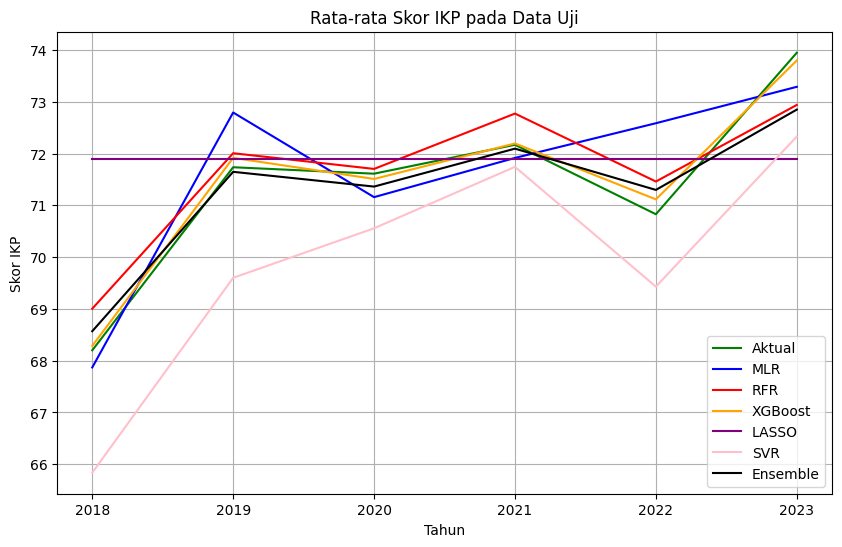

In [276]:
# Mengambil nilai rata-rata skor IKP aktual dan prediksi setiap tahunnya.
average_y_per_year = y_test_original.groupby(X_test['Tahun']).mean()
average_pred_per_year = pred_original.groupby(X_test['Tahun']).mean()
average_pred1_per_year = pred1_original.groupby(X_test['Tahun']).mean()
average_pred2_per_year = pred2_original.groupby(X_test['Tahun']).mean()
average_pred3_per_year = pred3_original.groupby(X_test['Tahun']).mean()
average_pred4_per_year = pred4_original.groupby(X_test['Tahun']).mean()
average_final_test_per_year = final_test_original.groupby(X_test['Tahun']).mean()

# Membuat diagram garis
tahun = ['2018', '2019', '2020', '2021', '2022', '2023']
plt.figure(figsize=(10, 6))
plt.plot(average_y_per_year.index, average_y_per_year.values, label="Aktual", color='green')
plt.plot(average_pred_per_year.index, average_pred_per_year.values, label="MLR", color='blue')
plt.plot(average_pred1_per_year.index, average_pred1_per_year.values, label="RFR", color='red')
plt.plot(average_pred2_per_year.index, average_pred2_per_year.values, label="XGBoost", color='orange')
plt.plot(average_pred3_per_year.index, average_pred3_per_year.values, label="LASSO", color='purple')
plt.plot(average_pred4_per_year.index, average_pred4_per_year.values, label="SVR", color='pink')
plt.plot(average_final_test_per_year.index, average_final_test_per_year.values, label="Ensemble", color='black')
plt.xlabel('Tahun')
plt.xticks(average_y_per_year.index, tahun)
plt.ylabel('Skor IKP')
plt.title('Rata-rata Skor IKP pada Data Uji')
plt.grid(True)
plt.legend()
plt.savefig("Aktual vs Prediksi.png", dpi=300)
plt.show()

# Prediksi ke Depan (tahun 2024)

In [277]:
#Label Encoding
salinan_skor_kab2024['Wilayah'] = w_encoder.transform(salinan_skor_kab2024['Wilayah'])
salinan_skor_kab2024.head()

,Wilayah,Tahun,NCPR,Kemiskinan (%),Pengeluaran Pangan (%),Tanpa Listrik (%),Tanpa Air Bersih (%),Lama Sekolah Perempuan (tahun),Rasio Tenaga Kesehatan,Angka Harapan Hidup (tahun),Stunting (%),Skor IKP
0,0,2024,0.67,17.86,31.65,0.00,23.36,10.27,1.46,68.34,33.4,78.27
1,1,2024,0.53,15.43,39.09,0.00,24.17,9.20,1.70,65.48,27.9,78.05
2,2,2024,0.48,13.38,26.96,0.43,10.06,10.87,1.38,70.14,30.1,84.72
3,3,2024,0.33,12.42,40.90,0.14,26.92,8.98,4.54,67.55,34.0,79.69
4,4,2024,0.84,12.10,37.42,0.00,34.05,8.50,2.22,64.81,40.2,73.84


In [278]:
salinan_skor_kab2024 = mc.fit_transform(salinan_skor_kab2024)
salinan_skor_kab2024 = pd.DataFrame(salinan_skor_kab2024, columns = selected_features)
salinan_skor_kab2024.head()

,Wilayah,Tahun,NCPR,Kemiskinan (%),Pengeluaran Pangan (%),Tanpa Listrik (%),Tanpa Air Bersih (%),Lama Sekolah Perempuan (tahun),Rasio Tenaga Kesehatan,Angka Harapan Hidup (tahun),Stunting (%),Skor IKP
0,0.000000,0.0,0.134,0.413090,0.331191,0.000000,0.234491,0.784468,0.016816,0.568213,0.665339,0.779886
1,0.001923,0.0,0.106,0.348702,0.412245,0.000000,0.242622,0.691099,0.019581,0.439442,0.555777,0.777210
2,0.003846,0.0,0.096,0.294383,0.280096,0.006140,0.100984,0.836824,0.015895,0.649257,0.599602,0.858324
3,0.005769,0.0,0.066,0.268945,0.431964,0.001999,0.270227,0.671902,0.052292,0.532643,0.677291,0.797154
4,0.007692,0.0,0.168,0.260466,0.394052,0.000000,0.341799,0.630017,0.025570,0.409275,0.800797,0.726012


In [279]:
X_predict = salinan_skor_kab2024.drop(['Skor IKP'], axis=1) # Drop Skor IKP prediksi if it exists
predictions = lr.predict(X_predict)

# Create a temporary DataFrame with the same columns as the original data
temp_df = salinan_skor_kab2024.copy()
temp_df = mc.inverse_transform(temp_df)
temp_df['Skor IKP'] = predictions  # Replace Skor IKP with predictions

# Perform inverse transform on the temporary DataFrame
predictions_unscaled_data = mc.inverse_transform(temp_df)
predictions_unscaled_df = pd.DataFrame(predictions_unscaled_data, columns=temp_df.columns)

# Extract the unscaled predictions for Skor IKP
predictions_unscaled = predictions_unscaled_df['Skor IKP'].values

# Add the predictions as a new column in the DataFrame
salinan_skor_kab2024['Skor IKP prediksi'] = predictions_unscaled

#Membuat salinan data
original_data = salinan_skor_kab2024.copy()

# Mengubah nama wilayah berupa numerik menjadi kategorial.
salinan_skor_kab2024['Wilayah'] = w_encoder.inverse_transform(original_data['Wilayah'].astype(int))
salinan_skor_kab2024.head()

IndexError: only integers, slices (`:`), ellipsis (`...`), numpy.newaxis (`None`) and integer or boolean arrays are valid indices